In [1]:
from google.colab import files

uploaded = files.upload()

Saving attackdata.json to attackdata.json
Saving attackdata2.json to attackdata2.json
Saving testdata.json to testdata.json
Saving testdata0.json to testdata0.json
Saving testdata2.json to testdata2.json
Saving testdata3.json to testdata3.json
Saving testdata4.json to testdata4.json
Saving testdata5.json to testdata5.json
Saving testdata6.json to testdata6.json
Saving testdata7.json to testdata7.json
Saving testdata8.json to testdata8.json
Saving testdata9.json to testdata9.json
Saving testdata10.json to testdata10.json
Saving testdata11.json to testdata11.json
Saving testdata12.json to testdata12.json
Saving testdata13.json to testdata13.json
Saving testdata14.json to testdata14.json
Saving testdata15.json to testdata15.json
Saving testdata16.json to testdata16.json
Saving testdata17.json to testdata17.json
Saving testdata18.json to testdata18.json
Saving testdata19.json to testdata19.json
Saving testdata20.json to testdata20.json


In [2]:
import numpy as np
from sklearn.mixture import GaussianMixture
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import euclidean
import torch.nn.functional as F
from tokenizers import Tokenizer
import pandas as pd
import matplotlib.pyplot as plt
!pip install utils

  Preparing metadata (setup.py) ... done
  Created wheel for utils: filename=utils-1.0.2-py2.py3-none-any.whl size=13906 sha256=934d91dd8d78488197e2c4d1ddeac07e52098b864d900951f46cab6262c66181
  Stored in directory: /root/.cache/pip/wheels/b8/39/f5/9d0ca31dba85773ececf0a7f5469f18810e1c8a8ed9da28ca7
Successfully built utils


###Preprocessing and encoding

In [3]:
import json

# Assuming your JSON file is named "data.json"
with open('testdata11.json', 'r') as f:
    data = json.load(f)

dataset=data

with open('testdata12.json', 'r') as f:
    data = json.load(f)

dataset+=data
with open('testdata13.json', 'r') as f:
    data = json.load(f)

dataset+=data
with open('testdata14.json', 'r') as f:
    data = json.load(f)

dataset+=data
with open('testdata15.json', 'r') as f:
    data = json.load(f)

dataset+=data
# with open('testdata16.json', 'r') as f:
#     data = json.load(f)

# dataset+=data
with open('testdata17.json', 'r') as f:
    data = json.load(f)

dataset+=data
with open('testdata18.json', 'r') as f:
    data = json.load(f)

dataset+=data
with open('testdata19.json', 'r') as f:
    data = json.load(f)

dataset+=data
with open('testdata20.json', 'r') as f:
    data = json.load(f)

dataset+=data

In [ ]:
print(dataset[0])

[{'BlockNumber': 15625410, 'TxHash': '0xc5f8f3448ff023c313c35579cc7ae704eef6be113a2edf0226e1171571d41cee', 'CallList': [{'to': '0xbadc0defafcf6d4239bdf0b66da4d7bd36fcf05a', 'from': '0x5354f00292296518713a47777bb6d2b9712fe74a', 'value': '0.0', 'gas': '0.000000000000168362', 'input': '0x69277b67'}, [[{'to': '0xdd6bd08c29ff3ef8780bf6a10d8b620a93ac5705', 'from': '0xbadc0defafcf6d4239bdf0b66da4d7bd36fcf05a', 'value': '0.0', 'gas': '0.000000000000108744', 'input': '0x69277b67'}, [{'to': '0x2f9ec37d6ccfff1cab21733bdadede11c823ccb0', 'from': '0xbadc0defafcf6d4239bdf0b66da4d7bd36fcf05a', 'value': '0.0', 'gas': '0.000000000000035571', 'input': '0x0c8496cc'}, [{'to': '0x52ae12abe5d8bd778bd5397f99ca900624cfadd4', 'from': '0x2f9ec37d6ccfff1cab21733bdadede11c823ccb0', 'value': '0.0', 'gas': '0.000000000000002861', 'input': '0xbb34534c42616e636f72466f726d756c61'}, {'to': '0xb1cd6e4153b2a390cf00a6556b0fc1458c4a5533', 'from': '0x2f9ec37d6ccfff1cab21733bdadede11c823ccb0', 'value': '0.0', 'gas': '0.00000

In [4]:
print(len(dataset))
print(dataset[0:10])

def hex_to_float32(hex_value):
    max_value=1e6
    # Remove '0x' prefix if present
    hex_value = hex_value.replace('0x', '')

    if not hex_value:
        hex_value = '0'

    # Convert hexadecimal to decimal
    decimal_value = int(hex_value, 16)

    # Scale down large values
    if decimal_value >= max_value:
        decimal_value = decimal_value%max_value

    # Convert decimal to float32
    float32_value = np.float32(decimal_value)

    return float32_value

def preprocess(dataset):
  flat_dataset = [item for sublist in dataset for item in sublist]


  def store_calls(data):
    calllist=[]
    for cur in data:
      cur['CallList'][1]=cur['CallList'][1][0]
      calllist.append(cur['CallList'])

    return calllist
  print(len(flat_dataset))
  calls=store_calls(flat_dataset)
  print(len(calls))
  def unnest(nested_list, level=0):
      encoded_list = []

      for item in nested_list:
          if isinstance(item, list):
              nested_encoded = unnest(item, level + 1)
              encoded_list.extend(nested_encoded)
          else:
              encoded_list.append(hex_to_float32(item["to"]))
              encoded_list.append(hex_to_float32(item["from"]))
              encoded_list.append(float(item["value"]))
              encoded_list.append(float(item["gas"]))
              encoded_list.append(hex_to_float32(item["input"]))
              encoded_list.append(float(level))

      return encoded_list



  unnested_calls=[]
    # Assuming each sublist in input_list is a sequence
  for seq in calls:
    unnested_calls.append(unnest(seq,0))
  return unnested_calls

unnested_calls=preprocess(dataset)

print(unnested_calls[0:10])

4854
[[{'BlockNumber': 10856170, 'TxHash': '0xc53cf799d700d81608b9d9d6aa4faf062db0c3e7ec219f72ac5eb068d47d48d2', 'CallList': [{'to': '0xd06527d5e56a3495252a528c4987003b712860ee', 'from': '0x1cd15d9ec87e926bcdc4345c11987914c57acb1f', 'value': '0.0', 'gas': '0.000000000000155493', 'input': '0xdb'}, [[{'to': '0x014872728e7d8b1c6781f96ecfbd262ea4d2e1a6', 'from': '0xd06527d5e56a3495252a528c4987003b712860ee', 'value': '0.0', 'gas': '0.000000000000003858', 'input': '0x15f24053'}, {'to': '0x3d5bc3c8d13dcb8bf317092d84783c2697ae9258', 'from': '0xd06527d5e56a3495252a528c4987003b712860ee', 'value': '0.0', 'gas': '0.000000000000071946', 'input': '0xeabe7d91'}, [{'to': '0x44a420700aac02c1f10b16152f93acb3aadff193', 'from': '0x3d5bc3c8d13dcb8bf317092d84783c2697ae9258', 'value': '0.0', 'gas': '0.000000000000069956', 'input': '0xeabe7d91'}, [{'to': '0xd06527d5e56a3495252a528c4987003b712860ee', 'from': '0x3d5bc3c8d13dcb8bf317092d84783c2697ae9258', 'value': '0.0', 'gas': '0.000000000000001044', 'input': '

In [ ]:
print(dataset[0])

[{'BlockNumber': 17743455, 'TxHash': '0xfa1f35af097eace0960dc1d70188200c11cacd3b1f68a4ff915551020ec7ab90', 'CallList': [{'to': '0xad3b67bca8935cb510c8d18bd45f0b94f54a968f', 'from': '0x49bcbc58848ac642b48f3d824d8b728a1045d08b', 'value': '0.0', 'gas': '0.000000000000735833', 'input': '0x06bb5402'}, [{'to': '0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48', 'from': '0xad3b67bca8935cb510c8d18bd45f0b94f54a968f', 'value': '0.0', 'gas': '0.000000000000009815', 'input': '0x70a08231'}, [{'to': '0xa2327a938febf5fec13bacfb16ae10ecbc4cbdcf', 'from': '0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48', 'value': '0.0', 'gas': '0.000000000000002529', 'input': '0x70a08231'}], {'to': '0xa88800cd213da5ae406ce248380802bd53b47647', 'from': '0xad3b67bca8935cb510c8d18bd45f0b94f54a968f', 'value': '0.0', 'gas': '0.000000000000800262', 'input': '0x0965d04b'}, [{'to': '0x0000000000000000000000000000000000000004', 'from': '0xa88800cd213da5ae406ce248380802bd53b47647', 'value': '0.0', 'gas': '0.000000000000000015', 'input': '

In [ ]:
import csv
csv_file_path = 'bad_contract.csv'

# Pad sequences to the maximum length in the dataset
max_sequence_length = max(len(seq) for seq in unnested_calls)
padded_data = [seq + [-1] * (max_sequence_length - len(seq)) for seq in unnested_calls]

# Write the list to a CSV file
with open(csv_file_path, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    for row in padded_data:
        writer.writerow(row)

print(f'CSV file "{csv_file_path}" has been created successfully.')

CSV file "bad_contract.csv" has been created successfully.


In [5]:
import numpy as np
import pandas as pd

minimum=0.0
maximum=0.0

def min_max_normalize(data, min=0.0, max=0.0):
    global minimum
    global maximum
    # Create a copy of the data array
    normalized_data = data.copy()

    # Find indices of non-zero elements
    nonzero_indices = np.where(normalized_data != 0.0)

    # Find the minimum and maximum values in the data (ignoring 0.0)
    if min + max == 0.0:
      print("This is the first normalization")
      min_value = np.min(normalized_data[nonzero_indices])
      max_value = np.max(normalized_data[nonzero_indices])
      minimum = min_value
      maximum = max_value
    else:
      min_value=min
      max_value=max

    # Normalize the non-zero data to be between 0 and 1
    normalized_data[nonzero_indices] = (normalized_data[nonzero_indices] - min_value) / (max_value - min_value)

    return normalized_data

def encode(data, max_length=0):
    # Calculate the maximum length of any column
    if max_length == 0:
      max_length = max(len(col) for col in data)+100

    padded_data = []
    for seq in data:
        if len(seq) > max_length:
            padded_seq = seq[:max_length]  # Truncate if sequence is too long
        else:
            padded_seq = seq + [0.0] * (max_length - len(seq))  # Pad with zeros
        padded_data.append(padded_seq)

    # Convert to numpy array
    print("SIZE")
    print(len(padded_data))
    print(len(padded_data[0]))
    padded_array = np.array(padded_data, dtype=float)

    # # Normalize each column independently
    normalized_array = np.apply_along_axis(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)) if np.max(x) != np.min(x) else x, axis=0, arr=padded_array)

    if max_length == 0:
      normalized_array = min_max_normalize(padded_array)
    else:
      normalized_array = min_max_normalize(padded_array, minimum, maximum)

    return normalized_array, max_length

# Example usage
input_data, maxL = encode(unnested_calls)
print(input_data)
print(input_data.shape)
print(maximum)
print(minimum)



SIZE
5523
2878
This is the first normalization
[[6.85123544e-01 6.89092306e-01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [8.51363462e-02 1.44923825e-01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [6.85123544e-01 5.01856356e-01 3.08059147e-04 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [6.85123544e-01 2.46383306e-01 1.00019204e-06 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [9.97439508e-01 6.94021252e-01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [6.85123544e-01 2.62706440e-01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
(5523, 2878)
999808.0
1e-17


In [ ]:
print(type(input_data))

<class 'numpy.ndarray'>


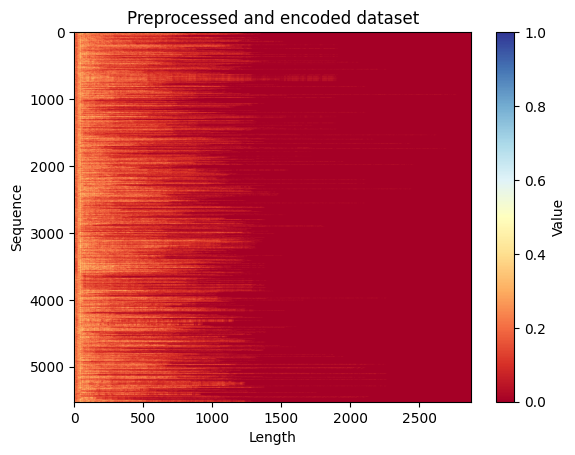

(5523, 2878)


In [6]:
def plot_patterns(data):
  plt.imshow(data, cmap='RdYlBu', aspect='auto')
  plt.colorbar(label='Value')
  plt.title('Preprocessed and encoded dataset')
  plt.xlabel('Length')
  plt.ylabel('Sequence')
  plt.show()


plot_patterns(input_data)
print(input_data.shape)

prep_data=input_data


###DAGMM


Epoch 0/100,TRAIN Loss: -0.4242 - TEST Loss: -0.4423
Epoch 10/100,TRAIN Loss: -0.5114 - TEST Loss: -0.5111
Epoch 20/100,TRAIN Loss: -0.5127 - TEST Loss: -0.5124
Epoch 30/100,TRAIN Loss: -0.5134 - TEST Loss: -0.5131
Epoch 40/100,TRAIN Loss: -0.5136 - TEST Loss: -0.5133
Epoch 50/100,TRAIN Loss: -0.5137 - TEST Loss: -0.5134
Epoch 60/100,TRAIN Loss: -0.5140 - TEST Loss: -0.5137
Epoch 70/100,TRAIN Loss: -0.5145 - TEST Loss: -0.5142
Epoch 80/100,TRAIN Loss: -0.5151 - TEST Loss: -0.5147
Epoch 90/100,TRAIN Loss: -0.5160 - TEST Loss: -0.5157


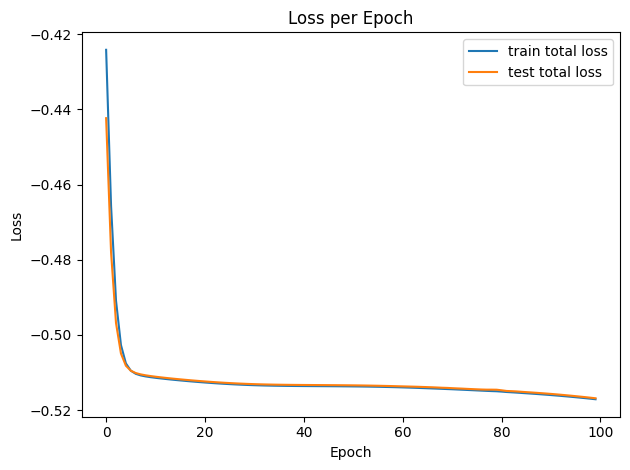

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from torch.autograd import Variable
import tensorflow as tf


# Define Deep Autoencoder
class Autoencoder(nn.Module):
    def __init__(self, input_dim, hidden_dim1, hidden_dim2, hidden_dim3, latent_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, hidden_dim1),
            nn.Tanh(),
            nn.Linear(hidden_dim1, hidden_dim2),
            nn.Tanh(),
            nn.Linear(hidden_dim2, hidden_dim3),
            nn.Tanh(),
            nn.Linear(hidden_dim3, latent_dim-2),
        )
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim-2, hidden_dim3),
            nn.Tanh(),
            nn.Linear(hidden_dim3, hidden_dim2),
            nn.Tanh(),
            nn.Linear(hidden_dim2, hidden_dim1),
            nn.Tanh(),
            nn.Linear(hidden_dim1, input_dim)

        )

    def forward(self, x):
        z = self.encoder(x)
        x_hat = self.decoder(z)
        return z, x_hat

# Define DAGMM Model
class DAGMM(nn.Module):
    def __init__(self, input_dim, hidden_dim1, hidden_dim2, hidden_dim3, latent_dim, n_gmm):
        super(DAGMM, self).__init__()
        self.autoencoder = Autoencoder(input_dim, hidden_dim1, hidden_dim2, hidden_dim3, latent_dim)
        self.estimation_network = nn.Sequential(
            nn.Linear(latent_dim, 30),
            nn.Tanh(),
            nn.Dropout(p=0.5),
            nn.Linear(30, n_gmm),
            nn.Softmax(dim=1)
        )
        self.phi = torch.zeros(n_gmm)
        self.mu = torch.zeros(n_gmm,latent_dim)
        self.cov = torch.zeros(n_gmm, latent_dim, latent_dim)
        self.n_gmm=n_gmm
        self.latent_dim=latent_dim

    def relative_euclidean_distance(self, a, b):
        return (a-b).norm(2, dim=1) / a.norm(2, dim=1)

    def compute_cosine_similarity(self, x, x_hat):
        cosine_similarity = F.cosine_similarity(x, x_hat, dim=1)
        return cosine_similarity

    def cov_diag_loss(self):
        cov_inv = torch.zeros(self.cov.size(0), self.cov.size(1), self.cov.size(1), device=self.cov.device)
        det_cov = torch.zeros(self.cov.size(0), device=self.cov.device)
        cov_diag = 0
        for i in range(self.cov.size(0)):
            cov_k = self.cov[i].clone()
            cov_k += torch.diag(torch.full((self.cov.size(1),), 1e-1, device=self.cov.device))
            cov_inv[i] = torch.linalg.inv(cov_k)
            u, s, v = torch.svd(cov_k)
            det_cov[i] = s.prod() ** 2
            cov_diag += torch.sum(1 / cov_k.diag())

        return cov_diag, cov_inv, det_cov


    def forward(self, x):
        z, x_hat = self.autoencoder(x)
        rec_euclidean = self.relative_euclidean_distance(x, x_hat)
        cosine_similarity = self.compute_cosine_similarity(x,x_hat)
        z_with_errors = torch.cat([z, rec_euclidean.unsqueeze(-1), cosine_similarity.unsqueeze(-1)], dim=1)
        gamma = self.estimation_network(z_with_errors)
        return z, x_hat, z_with_errors, gamma


    def compute_energy(self, z):
        cov_diag, cov_inv, det_cov = self.cov_diag_loss()
        z_mu = (z.unsqueeze(1)- self.mu.unsqueeze(0))
        z_mu_cov_inv = torch.sum(z_mu.unsqueeze(-1) * cov_inv.unsqueeze(0), dim=-2)
        exp_term = torch.exp(-0.5 * torch.sum(z_mu_cov_inv * z_mu, dim=-1))
        positive_exp_term = (-0.5 * torch.sum(z_mu_cov_inv * z_mu, dim=-1)).clamp(min=0)
        max_positive_exp_term = torch.max(positive_exp_term, dim=1, keepdim=True)[0]
        energy = -max_positive_exp_term.squeeze() - torch.log(
            torch.sum(self.phi.unsqueeze(0) * exp_term / (torch.sqrt(det_cov)).unsqueeze(0), dim=1) + 1e-12
        )
        return energy



    def loss_function(self, x, lambda_energy, lambda_cov_diag):
        _, x_hat, z, gamma, = self(x)
        N = gamma.size(0)
        sum_gamma = torch.sum(gamma, dim=0)
        if model.training:
          self.phi = (sum_gamma / N)
          self.mu = torch.sum(gamma.unsqueeze(-1) * z.unsqueeze(1), dim=0) / sum_gamma.unsqueeze(-1)
          z_mu = (z.unsqueeze(1)- self.mu.unsqueeze(0))
          z_mu_outer = z_mu.unsqueeze(-1) * z_mu.unsqueeze(-2)
          self.cov = torch.sum(gamma.unsqueeze(-1).unsqueeze(-1) * z_mu_outer, dim = 0) / sum_gamma.unsqueeze(-1).unsqueeze(-1)
        sample_energy = self.compute_energy(z)
        loss = torch.mean((x - x_hat) ** 2) + lambda_energy * torch.mean(sample_energy) + lambda_cov_diag * self.cov_diag_loss()[0]
        return loss

    def get_energy(self, x,  torch_type=True):
        enc, dec, z, gamma = self(x)
        energy = self.compute_energy(z)
        ret_energy=energy.data.numpy()

        if torch_type == True:
          ret_energy=torch.from_numpy(ret_energy)

        return ret_energy


# Hyperparameters
input_dim = len(prep_data[0])
hidden_dim1 = 1000
hidden_dim2 = 400
hidden_dim3 = 150
latent_dim = 3
n_gmm = 1
lr = 1e-5
epochs = 100
lambda_energy=0.1
lambda_cov_diag=0.005
batch_size = 300

# Create model and optimizer
model = DAGMM(input_dim, hidden_dim1, hidden_dim2, hidden_dim3, latent_dim, n_gmm)
optimizer = optim.Adam(model.parameters(), lr=lr)

train_data, test_data = train_test_split(torch.tensor(prep_data, dtype=torch.float), test_size=0.25, random_state=40)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False)

# Training function
def train(model, train_loader, test_loader, optimizer, num_epochs):
    train_losses = []
    test_losses = []
    for epoch in range(num_epochs):
        model.train()
        epoch_loss = 0.0
        epoch_loss_test = 0.0
        running_loss = 0.0
        test_running_loss=0.0
        count=0
        count_test=0
        for batch_idx, data in enumerate(train_loader):
            optimizer.zero_grad()
            total_loss = model.loss_function(data, lambda_energy, lambda_cov_diag)
            model.zero_grad()
            total_loss.backward()
            # torch.nn.utils.clip_grad_norm_(model.parameters(), 10)
            optimizer.step()
            running_loss += total_loss.item()

            loss = []
            loss.append( total_loss.item())
            count+=1
        epoch_loss=running_loss/count
        train_losses.append(epoch_loss)

        model.eval()
        with torch.no_grad():
            for batch_idx, data in enumerate(test_loader):
                test_loss = model.loss_function(data, lambda_energy, lambda_cov_diag)
                loss = []
                loss.append( test_loss.item())
                test_running_loss += test_loss.item()
                count_test+=1
        epoch_loss_test=test_running_loss/count_test
        test_losses.append(epoch_loss_test)
        if epoch%10 == 0:
          print(f"Epoch {epoch}/{num_epochs},TRAIN Loss: {epoch_loss:.4f} - TEST Loss: {epoch_loss_test:.4f}")
    return train_losses, test_losses


# Plotting function
def plot_losses(loss_data):
    plt.plot(loss_data[0], label="train total loss")
    plt.plot(loss_data[1], label="test total loss")
    plt.title('Loss per Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()
    # plt.ylim(loss_data[1][len(loss_data[0])-1]-2,loss_data[1][len(loss_data[0])-1]+2)
    plt.show()



# Train the model
losses = train(model, train_loader, test_loader, optimizer, epochs)

# Test the model
# test_losses = test(model, test_loader)

# avg_test_energy = sum(test_energy) / len(test_energy)

# Plot losses
plot_losses(losses)  # Broadcasting test loss to match training loss length
# print("Average Test Energy: ", avg_test_energy)
# plot_losses(test_losses)

threshold -6.814066362380982
Detected 20 anomalies in test.
Detected 36 anomalies in train.


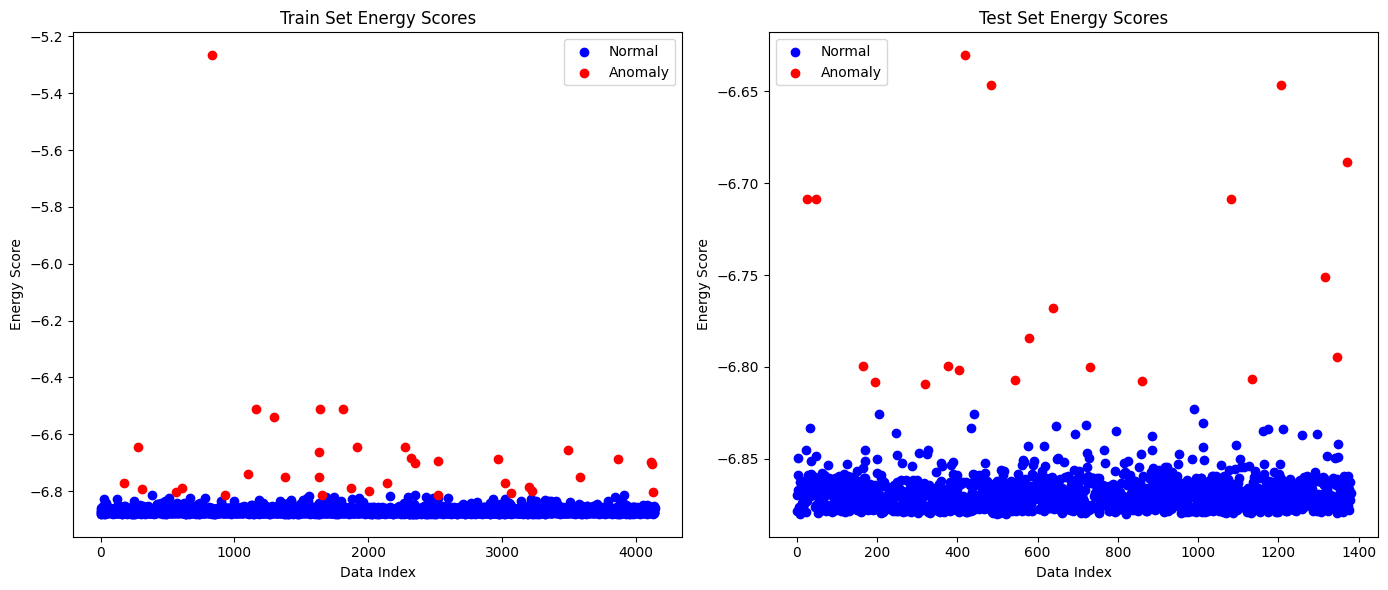

In [ ]:
import matplotlib.pyplot as plt

# Compute energy scores for train and test data
train_energy = model.get_energy(train_data)
test_energy = model.get_energy(test_data)

all_energy=np.concatenate((train_energy, test_energy), axis=0)

threshold = np.percentile(all_energy, 99)
print(f"threshold {threshold}")

anomaly_indices_test=torch.where(test_energy >= threshold)[0]

# anomaly_indices = (np.array(eval_energy) > threshold).astype(int)[0]
print(f"Detected {len(anomaly_indices_test)} anomalies in test.")

anomaly_indices_train=torch.where(train_energy >= threshold)[0]

# anomaly_indices = (np.array(eval_energy) > threshold).astype(int)[0]
print(f"Detected {len(anomaly_indices_train)} anomalies in train.")

# Create plots
plt.figure(figsize=(14, 6))

# Train set plot
plt.subplot(1, 2, 1)
normal_train_indices = torch.where(train_energy < threshold)[0]
anomaly_train_indices = torch.where(train_energy >= threshold)[0]
plt.scatter(normal_train_indices, train_energy[normal_train_indices], c='blue', label='Normal')
plt.scatter(anomaly_train_indices, train_energy[anomaly_train_indices], c='red', label='Anomaly')
plt.title('Train Set Energy Scores')
plt.xlabel('Data Index')
plt.ylabel('Energy Score')
plt.legend()

# Test set plot
plt.subplot(1, 2, 2)
normal_test_indices = torch.where(test_energy < threshold)[0]
anomaly_test_indices = torch.where(test_energy >= threshold)[0]
plt.scatter(normal_test_indices, test_energy[normal_test_indices], c='blue', label='Normal')
plt.scatter(anomaly_test_indices, test_energy[anomaly_test_indices], c='red', label='Anomaly')
plt.title('Test Set Energy Scores')
plt.xlabel('Data Index')
plt.ylabel('Energy Score')
plt.legend()


plt.tight_layout()
plt.show()

In [ ]:
# Find the index of the maximum energy score
max_energy_index = torch.argmax(train_energy)
print(train_energy[torch.argmax(train_energy)])

print("Index of the maximum energy score:", max_energy_index.item())
matching=train_data[max_energy_index]
matching_index = None
for i, node in enumerate(torch.tensor(prep_data, dtype=torch.float)):
    if np.array_equal(node, matching):
        matching_index = i
        break

flat_dataset = [item for sublist in dataset for item in sublist]
print("Index of matching node:", matching_index)
print("in dataset: ", flat_dataset[matching_index])

max_energy_index = torch.argmax(test_energy)
print(test_energy[max_energy_index])

print("Index of the maximum energy score:", max_energy_index.item())
matching=test_data[max_energy_index]
matching_index = None
for i, node in enumerate(torch.tensor(prep_data, dtype=torch.float)):
    if np.array_equal(node, matching):
        matching_index = i
        break

flat_dataset = [item for sublist in dataset for item in sublist]
print("Index of matching node:", matching_index)
print("in dataset: ", flat_dataset[matching_index])

tensor(-5.2660)
Index of the maximum energy score: 831
Index of matching node: 1387
in dataset:  {'BlockNumber': 10849974, 'TxHash': '0x7e92af79ccbb04fed7b26bf9396f9e283e92779afd0d766a2234543f22b17572', 'CallList': [{'to': '0xd06527d5e56a3495252a528c4987003b712860ee', 'from': '0xfd8f30441c0344b305bc6355537d93ec184c42ca', 'value': '0.0', 'gas': '0.000000000000057225', 'input': '0xa6afed95'}, [{'to': '0x014872728e7d8b1c6781f96ecfbd262ea4d2e1a6', 'from': '0xd06527d5e56a3495252a528c4987003b712860ee', 'value': '0.0', 'gas': '0.000000000000003858', 'input': '0x15f24053'}]]}
tensor(-6.6303)
Index of the maximum energy score: 420
Index of matching node: 5033
in dataset:  {'BlockNumber': 10828741, 'TxHash': '0x811cbb76c25eb42cd4ab97343b83d1ddd28cdc2f825a601d8b1fc14edda6ed4f', 'CallList': [{'to': '0x3d5bc3c8d13dcb8bf317092d84783c2697ae9258', 'from': '0xc77c3efb55bd7b0e44c13eb27eb33c98597f0a68', 'value': '0.0', 'gas': '0.000000000000034846', 'input': '0xede4edd'}, [{'to': '0x44a420700aac02c1f10b1

17
17
91
91
SIZE
91
2878
8
8
SIZE
8
2878
66
948
SIZE
17
2878
(17, 2878)


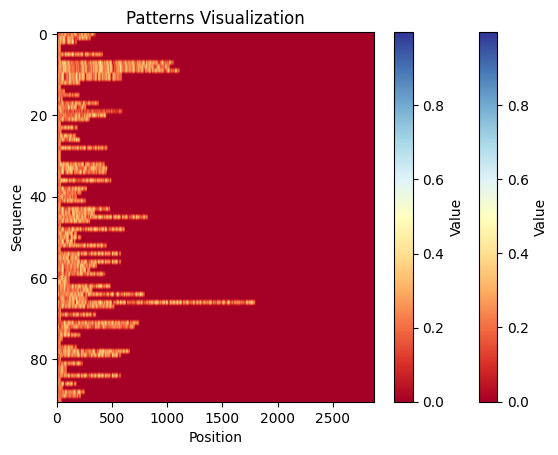

eval 1:  tensor([-6.8723, -6.8773, -6.8530, -6.8726, -6.8542, -6.8762, -6.8536, -6.8754,
        -6.8766, -6.8788, -6.8722, -6.8788, -6.8787, -6.8736, -6.8784, -6.8787,
        -6.7510])


In [ ]:
with open('attackdata.json', 'r') as f:
    data = json.load(f)

with open('attackdata2.json', 'r') as f:
    data += json.load(f)


anomally_dataset=data

anom1 = preprocess(anomally_dataset)

with open('testdata.json', 'r') as f:
    data = json.load(f)

dataset=data

with open('testdata2.json', 'r') as f:
    data = json.load(f)

dataset+=data
with open('testdata3.json', 'r') as f:
    data = json.load(f)

dataset+=data

with open('testdata4.json', 'r') as f:
    data = json.load(f)

dataset+=data

with open('testdata5.json', 'r') as f:
    data = json.load(f)

dataset+=data
with open('testdata6.json', 'r') as f:
    data = json.load(f)

dataset+=data
with open('testdata7.json', 'r') as f:
    data = json.load(f)

dataset+=data
with open('testdata8.json', 'r') as f:
    data = json.load(f)

dataset+=data
with open('testdata9.json', 'r') as f:
    data = json.load(f)

dataset+=data
with open('testdata10.json', 'r') as f:
    data = json.load(f)

dataset+=data
example1=dataset

with open('testdata0.json', 'r') as f:
    data = json.load(f)

example2=data

exam0 = preprocess(example1)
exam_fin,_=encode(exam0, maxL)
ex0 = torch.tensor(exam_fin, dtype=torch.float)

exam2 = preprocess(example2)
exam_fin2,_=encode(exam2, maxL)
ex2 = torch.tensor(exam_fin2, dtype=torch.float)


print(len(unnested_calls[0]))
print(len(anom1[0]))
anom_fin,_=encode(anom1, maxL)
anom = torch.tensor(anom_fin, dtype=torch.float)

def plot_patterns(data):
  plt.imshow(data, cmap='RdYlBu', aspect='auto')
  plt.colorbar(label='Value')
  plt.title('Patterns Visualization')
  plt.xlabel('Position')
  plt.ylabel('Sequence')
  plt.gca().yaxis.get_major_locator().set_params(integer=True)



plot_patterns(anom_fin)
plot_patterns(exam_fin)
# plot_patterns(exam_fin2)
print(anom_fin.shape)
plt.show()

model.eval()  # Set the model to evaluation mode
with torch.no_grad():
  res1=model.get_energy(anom)
  resex=model.get_energy(ex0)
  resex2=model.get_energy(ex2)

print("eval 1: ", res1)


<class 'torch.Tensor'>
tensor([-6.8701, -6.8698, -6.8644, -6.8402, -6.8406, -6.8775, -6.8397, -6.8724,
        -6.8564, -6.8610, -6.8756, -6.8756, -6.8696, -6.8402, -6.8585, -6.8584,
        -6.8074, -6.8642, -6.8522, -6.8672, -6.8766, -6.8714, -6.8406, -6.8596,
        -6.8121, -6.8649, -6.8690, -6.8388, -6.8788, -6.8397, -6.8346, -6.8397,
        -6.8751, -6.8778, -6.8752, -6.8401, -6.8722, -6.7699, -6.8700, -6.8633,
        -6.8683, -6.8718, -6.8403, -6.8760, -6.8734, -6.8556, -6.8751, -6.7759,
        -6.8782, -6.8527, -6.8704, -6.8661, -6.8788, -6.8403, -6.8777, -6.8603,
        -6.8777, -6.8732, -6.8711, -6.8568, -6.8645, -6.8351, -6.8793, -6.8742,
        -6.8758, -6.8554, -6.8366, -6.8757, -6.7431, -6.8671, -6.7027, -6.8658,
        -6.8776, -6.8633, -6.8695, -6.8525, -6.8396, -6.8609, -6.8793, -6.8779,
        -6.7431, -6.8551, -6.8726, -6.8726, -6.8779, -6.8395, -6.8682, -6.8468,
        -6.8641, -6.8552, -6.8080])
tensor([-6.8723, -6.8773, -6.8530, -6.8726, -6.8542, -6.8762,

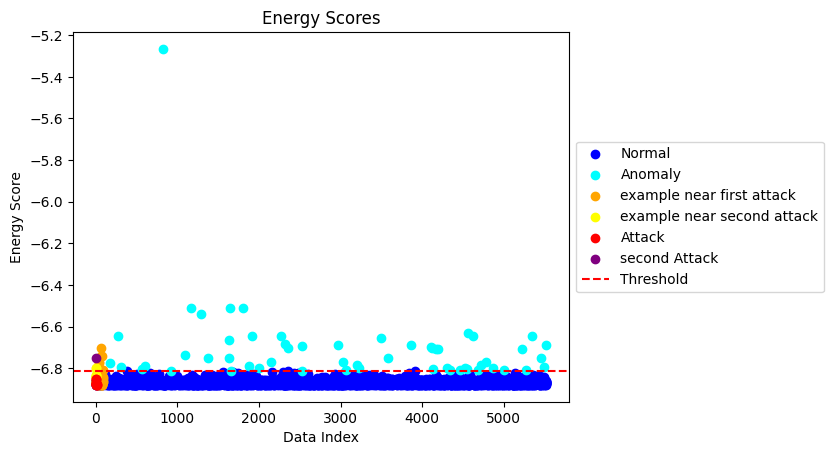

In [ ]:
print(type(test_energy))

normal_energy=torch.cat((train_energy, test_energy), dim=0)

normal_indices = torch.where(normal_energy < threshold)[0]
anomaly_indices = torch.where(normal_energy >= threshold)[0]
attack = res1.detach()
example0 = resex.detach()
example2 = resex2.detach()
print(example0)


plt.scatter(normal_indices, normal_energy[normal_indices], c='blue', label='Normal')
plt.scatter(anomaly_indices, normal_energy[anomaly_indices], c='cyan', label='Anomaly')
print(attack)
plt.scatter(range(len(example0)), example0, c='orange', label='example near first attack')
plt.scatter(range(len(example2)), example2, c='yellow', label='example near second attack')

plt.scatter(range(len(attack[0:15])), attack[0:15], c='red', label='Attack')
plt.scatter(1, attack[-1], c='purple', label='second Attack')

plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')
plt.title('Energy Scores')
plt.xlabel('Data Index')
plt.ylabel('Energy Score')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

if(attack[-1]>threshold):
  print("Found you")
else:
  print("try again")


505
505
SIZE
505
2878


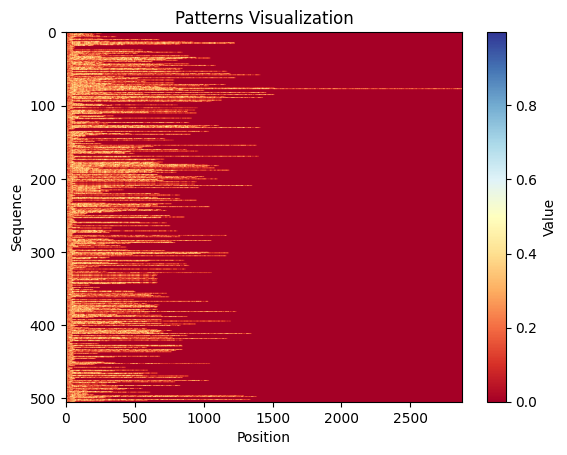

In [ ]:
with open('testdata16.json', 'r') as f:
    data = json.load(f)

example_dataset=data

# with open('attackdata.json', 'r') as f:
#     data = json.load(f)

# example_dataset+=[data]


exam1 = preprocess(example_dataset)

exam_fin, _=encode(exam1, maxL)
exam = torch.tensor(exam_fin, dtype=torch.float)



plot_patterns(exam_fin)

model.eval()  # Set the model to evaluation mode
with torch.no_grad():
  res2=model.get_energy(exam)



[]

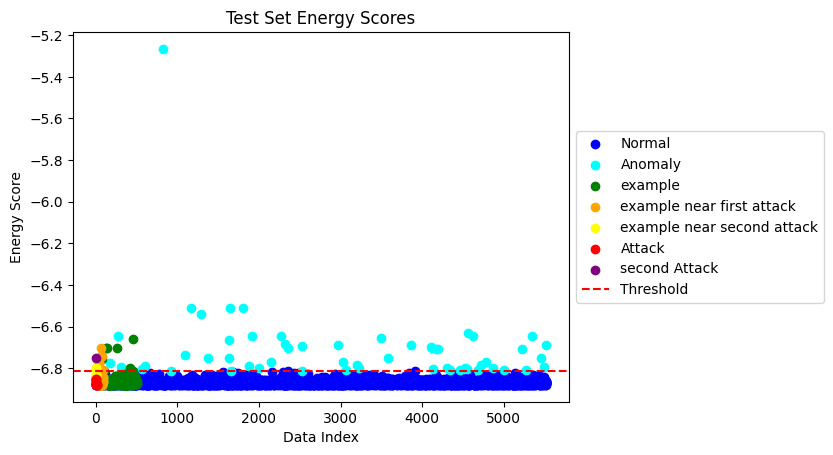

In [ ]:
example = res2.detach()

plt.scatter(normal_indices, normal_energy[normal_indices], c='blue', label='Normal')
plt.scatter(anomaly_indices, normal_energy[anomaly_indices], c='cyan', label='Anomaly')
plt.scatter(range(len(example)), example, c='green', label='example')
plt.scatter(range(len(example0)), example0, c='orange', label='example near first attack')
plt.scatter(range(len(example2)), example2, c='yellow', label='example near second attack')

plt.scatter(range(len(attack[0:15])), attack[0:15], c='red', label='Attack')
plt.scatter(1, attack[-1], c='purple', label='second Attack')

plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Test Set Energy Scores')
plt.xlabel('Data Index')
plt.ylabel('Energy Score')
plt.plot()


In [ ]:
max_energy_index = torch.argmax(example)
print("Index of the maximum energy score:", max_energy_index.item())
matching=example[max_energy_index].item()
matching_index = None
# for i, node in enumerate(torch.tensor(exam_fin, dtype=torch.float)):
#     if np.array_equal(node, matching):
#         matching_index = i
#         break

flat_dataset = [item for sublist in example_dataset for item in sublist]
print("Energy found:", matching)
if matching != None:
  print("in dataset: ", flat_dataset[max_energy_index])

Index of the maximum energy score: 456
Energy found: -6.6594319343566895
in dataset:  {'BlockNumber': 10838474, 'TxHash': '0xfec7e907c71297838300191b18f298425e219d32ec39cf5d7e47f903e6973784', 'CallList': [{'to': '0x3d5bc3c8d13dcb8bf317092d84783c2697ae9258', 'from': '0x2d2d2a1f9bfda0d2364b4d517f862e52fefc2703', 'value': '0.0', 'gas': '0.000000000000036342', 'input': '0xede4edd'}, [{'to': '0x44a420700aac02c1f10b16152f93acb3aadff193', 'from': '0x3d5bc3c8d13dcb8bf317092d84783c2697ae9258', 'value': '0.0', 'gas': '0.000000000000012941', 'input': '0xede4edd'}, [{'to': '0xd06527d5e56a3495252a528c4987003b712860ee', 'from': '0x3d5bc3c8d13dcb8bf317092d84783c2697ae9258', 'value': '0.0', 'gas': '0.000000000000009027', 'input': '0xc37f68e2'}]]]}


In [ ]:
found=[]
threshold_value=[]
attack_energy=[]
example_above_thres=[]
train_above_attack=[]
test_above_attack=[]
example_above_attack=[]

In [ ]:
def print_metrics(threshold, train_energy, test_energy, attack, example):

  print("the attack is found by the model: ", (attack[0] >= threshold).item())
  print("The threshold is: ", threshold)
  print("The energy value of the attack is: ", attack[0].item())
  print("the highest energy in train is: ", train_energy[torch.argmax(train_energy)])
  print("the highest energy in test is: ", test_energy[torch.argmax(test_energy)])
  print("the highest energy in example is: ", example[torch.argmax(example)])
  found.append((attack[0] >= threshold).item())
  threshold_value.append(threshold)
  attack_energy.append(attack[0].item())

  print("------------------")

  print("number of transactions with energy greater or equal to the threshold in train is: ", len(torch.where(train_energy >= threshold)[0]), " out of: ", len(train_energy))
  print("number of transactions with energy greater or equal to the threshold in test is: ", len(torch.where(test_energy >= threshold)[0]), " out of: ", len(test_energy))
  print("number of transactions with energy greater or equal to the threshold in example is: ", len(torch.where(example >= threshold)[0]), " out of: ", len(example))
  example_above_thres.append(len(torch.where(example >= threshold)[0]))
  print("------------------")

  print("number of transactions with energy greater or equal to the attack in train is: ", len(torch.where(train_energy >= attack[0])[0]), " out of: ", len(train_energy))
  print("number of transactions with energy greater or equal to the attack in test is: ", len(torch.where(test_energy >= attack[0])[0]), " out of: ", len(test_energy))
  print("number of transactions with energy greater or equal to the attack in example is: ", len(torch.where(example >= attack[0])[0]), " out of: ", len(example))
  train_above_attack.append(len(torch.where(train_energy >= attack[0])[0]))
  test_above_attack.append(len(torch.where(test_energy >= attack[0])[0]))
  example_above_attack.append(len(torch.where(example >= attack[0])[0]))
  print("------------------")

  print("average energy value in train is: ",torch.mean(train_energy))
  print("average energy value in test is: ",torch.mean(test_energy))
  print("average energy value in example is: ",torch.mean(example))

print_metrics(threshold, train_energy, test_energy, attack, example)

the attack is found by the model:  False
The threshold is:  -6.793541431427002
The energy value of the attack is:  -6.868922710418701
the highest energy in train is:  tensor(-5.1076)
the highest energy in test is:  tensor(-6.6301)
the highest energy in example is:  tensor(-6.6630)
------------------
number of transactions with energy greater or equal to the threshold in train is:  41  out of:  4142
number of transactions with energy greater or equal to the threshold in test is:  16  out of:  1381
number of transactions with energy greater or equal to the threshold in example is:  5  out of:  505
------------------
number of transactions with energy greater or equal to the attack in train is:  2865  out of:  4142
number of transactions with energy greater or equal to the attack in test is:  950  out of:  1381
number of transactions with energy greater or equal to the attack in example is:  351  out of:  505
------------------
average energy value in train is:  tensor(-6.8602)
average en

In [ ]:
def mean(lst):
    if not lst:
        return None  # Handle empty list case
    return sum(lst) / len(lst)

print(len(found))
print("av found : ", mean(found))
print("av threshold_value : ", mean(threshold_value))
print("av attack_energy : ", mean(attack_energy))
print("av example_above_thres : ", mean(example_above_thres))
print("av train_above_attack : ", mean(train_above_attack))
print("av test_above_attack : ", mean(test_above_attack))
print("av example_above_attack : ", mean(example_above_attack))

1
av found :  0.0
av threshold_value :  -6.793541431427002
av attack_energy :  -6.868922710418701
av example_above_thres :  5.0
av train_above_attack :  2865.0
av test_above_attack :  950.0
av example_above_attack :  351.0


###True-False

In i=  0
Epoch 0/100,TRAIN Loss: -0.4273 - TEST Loss: -0.4532
Epoch 10/100,TRAIN Loss: -0.5113 - TEST Loss: -0.5114
Epoch 20/100,TRAIN Loss: -0.5125 - TEST Loss: -0.5127
Epoch 30/100,TRAIN Loss: -0.5134 - TEST Loss: -0.5137
Epoch 40/100,TRAIN Loss: -0.5138 - TEST Loss: -0.5141
Epoch 50/100,TRAIN Loss: -0.5142 - TEST Loss: -0.5144
Epoch 60/100,TRAIN Loss: -0.5147 - TEST Loss: -0.5149
Epoch 70/100,TRAIN Loss: -0.5153 - TEST Loss: -0.5155
Epoch 80/100,TRAIN Loss: -0.5162 - TEST Loss: -0.5164
Epoch 90/100,TRAIN Loss: -0.5175 - TEST Loss: -0.5178


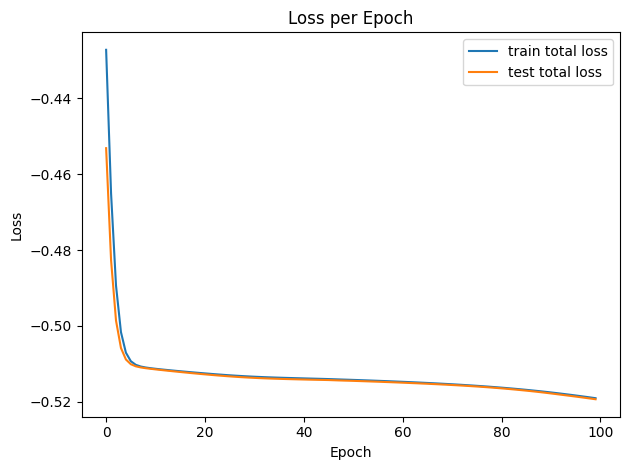

91
91
SIZE
91
2878
8
8
SIZE
8
2878
505
505
SIZE
505
2878
16
16
SIZE
16
2878
1
1
SIZE
1
2878
[[0.0, 1.0, 0.0, 1.0], [0.0, 1.0, 0.0, 1.0], [0.0, 0.9832214765100671, 0.016778523489932886, 1.0], [0.0, 0.9798657718120806, 0.020134228187919462, 1.0], [0.0, 0.9043624161073825, 0.09563758389261745, 1.0], [0.0, 0.8741610738255033, 0.12583892617449666, 1.0], [0.1875, 0.7080536912751678, 0.29194630872483224, 0.8125]]
attack1
True possitive:  0.0
True negative:  1.0
False possitive:  0.0
False negative:  1.0
True possitive:  0.0
True negative:  1.0
False possitive:  0.0
False negative:  1.0
True possitive:  0.0
True negative:  0.9832214765100671
False possitive:  0.016778523489932886
False negative:  1.0
True possitive:  0.0
True negative:  0.9798657718120806
False possitive:  0.020134228187919462
False negative:  1.0
True possitive:  0.0
True negative:  0.9043624161073825
False possitive:  0.09563758389261745
False negative:  1.0
True possitive:  0.0
True negative:  0.8741610738255033
False possi

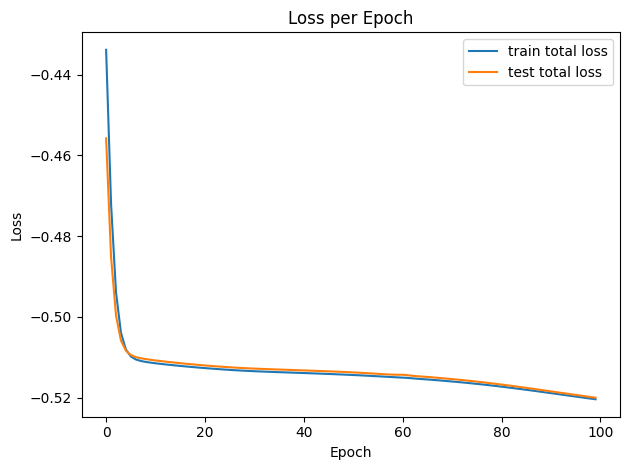

91
91
SIZE
91
2878
8
8
SIZE
8
2878
505
505
SIZE
505
2878
16
16
SIZE
16
2878
1
1
SIZE
1
2878
[[0.0, 1.0, 0.0, 1.0], [0.0, 1.0, 0.0, 1.0], [0.0, 0.9865771812080537, 0.013422818791946308, 1.0], [0.0, 0.9832214765100671, 0.016778523489932886, 1.0], [0.0, 0.9110738255033557, 0.08892617449664429, 1.0], [0.0, 0.8741610738255033, 0.12583892617449666, 1.0], [0.0, 0.6895973154362416, 0.3104026845637584, 1.0]]
attack1
True possitive:  0.0
True negative:  1.0
False possitive:  0.0
False negative:  1.0
True possitive:  0.0
True negative:  1.0
False possitive:  0.0
False negative:  1.0
True possitive:  0.0
True negative:  0.9865771812080537
False possitive:  0.013422818791946308
False negative:  1.0
True possitive:  0.0
True negative:  0.9832214765100671
False possitive:  0.016778523489932886
False negative:  1.0
True possitive:  0.0
True negative:  0.9110738255033557
False possitive:  0.08892617449664429
False negative:  1.0
True possitive:  0.0
True negative:  0.8741610738255033
False possitive:  

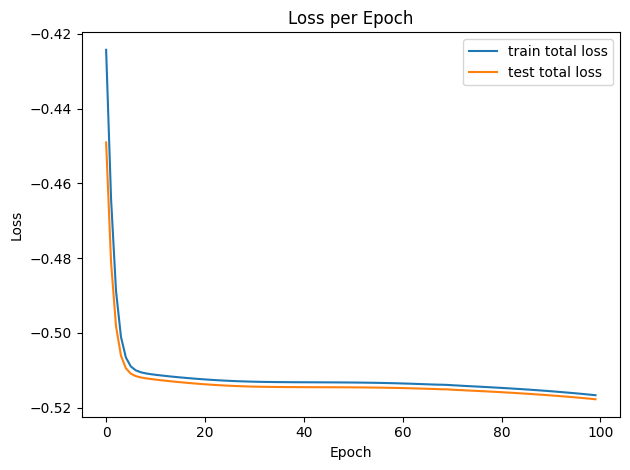

91
91
SIZE
91
2878
8
8
SIZE
8
2878
505
505
SIZE
505
2878
16
16
SIZE
16
2878
1
1
SIZE
1
2878
[[0.0, 1.0, 0.0, 1.0], [0.0, 1.0, 0.0, 1.0], [0.0, 0.988255033557047, 0.01174496644295302, 1.0], [0.0, 0.9731543624161074, 0.026845637583892617, 1.0], [0.125, 0.9077181208053692, 0.09228187919463088, 0.875], [0.1875, 0.8758389261744967, 0.12416107382550336, 0.8125], [0.1875, 0.7197986577181208, 0.2802013422818792, 0.8125]]
attack1
True possitive:  0.0
True negative:  1.0
False possitive:  0.0
False negative:  1.0
True possitive:  0.0
True negative:  1.0
False possitive:  0.0
False negative:  1.0
True possitive:  0.0
True negative:  0.988255033557047
False possitive:  0.01174496644295302
False negative:  1.0
True possitive:  0.0
True negative:  0.9731543624161074
False possitive:  0.026845637583892617
False negative:  1.0
True possitive:  0.125
True negative:  0.9077181208053692
False possitive:  0.09228187919463088
False negative:  0.875
True possitive:  0.1875
True negative:  0.8758389261744967

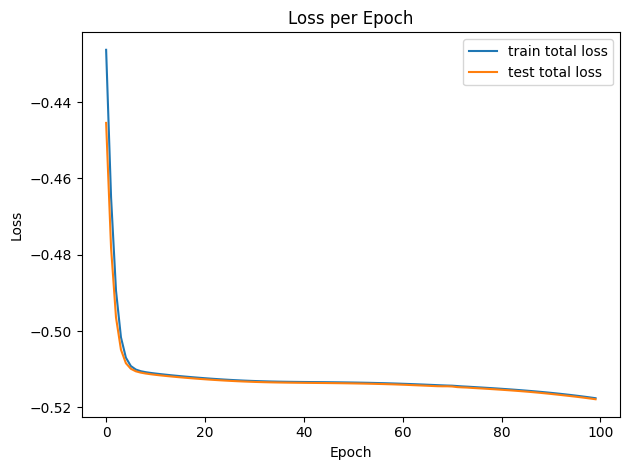

91
91
SIZE
91
2878
8
8
SIZE
8
2878
505
505
SIZE
505
2878
16
16
SIZE
16
2878
1
1
SIZE
1
2878
[[0.0, 1.0, 0.0, 1.0], [0.0, 1.0, 0.0, 1.0], [0.0, 0.988255033557047, 0.01174496644295302, 1.0], [0.0, 0.9748322147651006, 0.025167785234899327, 1.0], [0.0, 0.9060402684563759, 0.09395973154362416, 1.0], [0.1875, 0.8540268456375839, 0.14597315436241612, 0.8125], [0.1875, 0.6929530201342282, 0.3070469798657718, 0.8125]]
attack1
True possitive:  0.0
True negative:  1.0
False possitive:  0.0
False negative:  1.0
True possitive:  0.0
True negative:  1.0
False possitive:  0.0
False negative:  1.0
True possitive:  0.0
True negative:  0.988255033557047
False possitive:  0.01174496644295302
False negative:  1.0
True possitive:  0.0
True negative:  0.9748322147651006
False possitive:  0.025167785234899327
False negative:  1.0
True possitive:  0.0
True negative:  0.9060402684563759
False possitive:  0.09395973154362416
False negative:  1.0
True possitive:  0.1875
True negative:  0.8540268456375839
False p

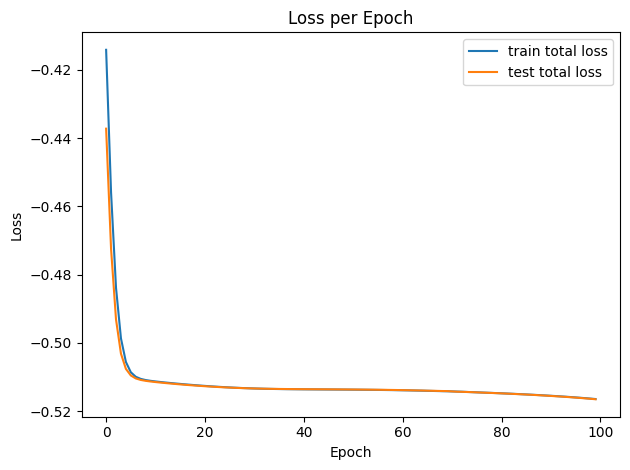

91
91
SIZE
91
2878
8
8
SIZE
8
2878
505
505
SIZE
505
2878
16
16
SIZE
16
2878
1
1
SIZE
1
2878
[[0.0, 1.0, 0.0, 1.0], [0.0, 1.0, 0.0, 1.0], [0.0, 0.988255033557047, 0.01174496644295302, 1.0], [0.0, 0.9697986577181208, 0.030201342281879196, 1.0], [0.1875, 0.8976510067114094, 0.10234899328859061, 0.8125], [0.1875, 0.860738255033557, 0.13926174496644295, 0.8125], [0.1875, 0.7265100671140939, 0.27348993288590606, 0.8125]]
attack1
True possitive:  0.0
True negative:  1.0
False possitive:  0.0
False negative:  1.0
True possitive:  0.0
True negative:  1.0
False possitive:  0.0
False negative:  1.0
True possitive:  0.0
True negative:  0.988255033557047
False possitive:  0.01174496644295302
False negative:  1.0
True possitive:  0.0
True negative:  0.9697986577181208
False possitive:  0.030201342281879196
False negative:  1.0
True possitive:  0.1875
True negative:  0.8976510067114094
False possitive:  0.10234899328859061
False negative:  0.8125
True possitive:  0.1875
True negative:  0.860738255033

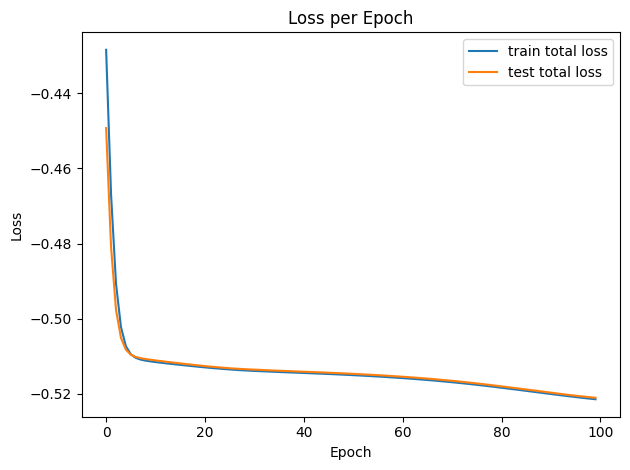

91
91
SIZE
91
2878
8
8
SIZE
8
2878
505
505
SIZE
505
2878
16
16
SIZE
16
2878
1
1
SIZE
1
2878
[[0.0, 1.0, 0.0, 1.0], [0.0, 1.0, 0.0, 1.0], [0.0, 0.9865771812080537, 0.013422818791946308, 1.0], [0.0, 0.9815436241610739, 0.018456375838926176, 1.0], [0.1875, 0.9312080536912751, 0.06879194630872483, 0.8125], [0.1875, 0.8808724832214765, 0.11912751677852348, 0.8125], [0.1875, 0.7181208053691275, 0.28187919463087246, 0.8125]]
attack1
True possitive:  0.0
True negative:  1.0
False possitive:  0.0
False negative:  1.0
True possitive:  0.0
True negative:  1.0
False possitive:  0.0
False negative:  1.0
True possitive:  0.0
True negative:  0.9865771812080537
False possitive:  0.013422818791946308
False negative:  1.0
True possitive:  0.0
True negative:  0.9815436241610739
False possitive:  0.018456375838926176
False negative:  1.0
True possitive:  0.1875
True negative:  0.9312080536912751
False possitive:  0.06879194630872483
False negative:  0.8125
True possitive:  0.1875
True negative:  0.8808724

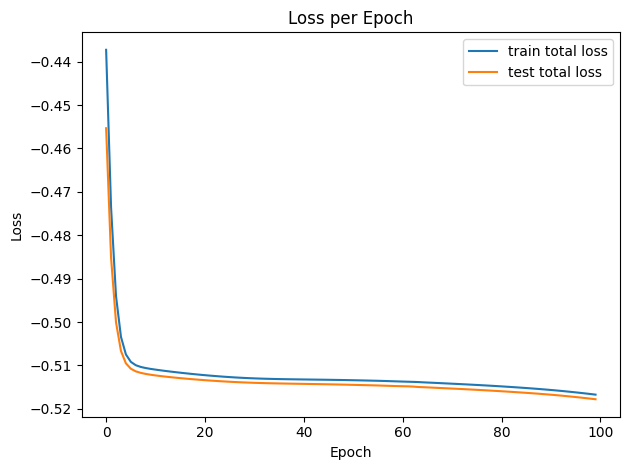

91
91
SIZE
91
2878
8
8
SIZE
8
2878
505
505
SIZE
505
2878
16
16
SIZE
16
2878
1
1
SIZE
1
2878
[[0.0, 1.0, 0.0, 1.0], [0.0, 1.0, 0.0, 1.0], [0.0, 0.9899328859060402, 0.010067114093959731, 1.0], [0.0, 0.9731543624161074, 0.026845637583892617, 1.0], [0.1875, 0.9043624161073825, 0.09563758389261745, 0.8125], [0.1875, 0.8489932885906041, 0.15100671140939598, 0.8125], [0.25, 0.6812080536912751, 0.3187919463087248, 0.75]]
attack1
True possitive:  0.0
True negative:  1.0
False possitive:  0.0
False negative:  1.0
True possitive:  0.0
True negative:  1.0
False possitive:  0.0
False negative:  1.0
True possitive:  0.0
True negative:  0.9899328859060402
False possitive:  0.010067114093959731
False negative:  1.0
True possitive:  0.0
True negative:  0.9731543624161074
False possitive:  0.026845637583892617
False negative:  1.0
True possitive:  0.1875
True negative:  0.9043624161073825
False possitive:  0.09563758389261745
False negative:  0.8125
True possitive:  0.1875
True negative:  0.848993288590

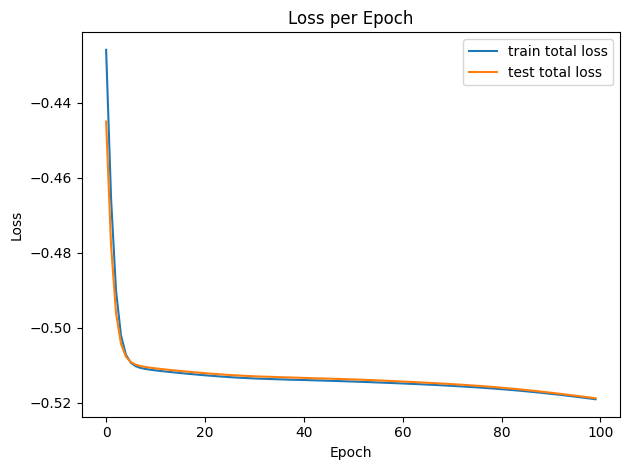

91
91
SIZE
91
2878
8
8
SIZE
8
2878
505
505
SIZE
505
2878
16
16
SIZE
16
2878
1
1
SIZE
1
2878
[[0.0, 1.0, 0.0, 1.0], [0.0, 1.0, 0.0, 1.0], [0.0, 0.9832214765100671, 0.016778523489932886, 1.0], [0.0, 0.9765100671140939, 0.02348993288590604, 1.0], [0.0, 0.9043624161073825, 0.09563758389261745, 1.0], [0.0, 0.8624161073825504, 0.13758389261744966, 1.0], [0.125, 0.6862416107382551, 0.313758389261745, 0.875]]
attack1
True possitive:  0.0
True negative:  1.0
False possitive:  0.0
False negative:  1.0
True possitive:  0.0
True negative:  1.0
False possitive:  0.0
False negative:  1.0
True possitive:  0.0
True negative:  0.9832214765100671
False possitive:  0.016778523489932886
False negative:  1.0
True possitive:  0.0
True negative:  0.9765100671140939
False possitive:  0.02348993288590604
False negative:  1.0
True possitive:  0.0
True negative:  0.9043624161073825
False possitive:  0.09563758389261745
False negative:  1.0
True possitive:  0.0
True negative:  0.8624161073825504
False possitive: 

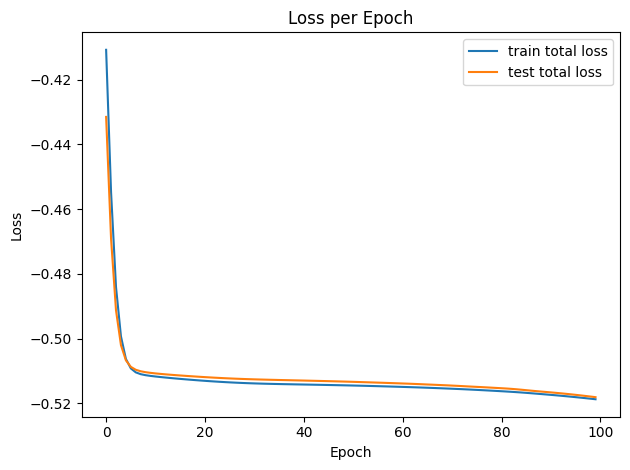

91
91
SIZE
91
2878
8
8
SIZE
8
2878
505
505
SIZE
505
2878
16
16
SIZE
16
2878
1
1
SIZE
1
2878
[[0.0, 1.0, 0.0, 1.0], [0.0, 1.0, 0.0, 1.0], [0.0, 0.9865771812080537, 0.013422818791946308, 1.0], [0.0, 0.9765100671140939, 0.02348993288590604, 1.0], [0.1875, 0.9077181208053692, 0.09228187919463088, 0.8125], [0.1875, 0.8758389261744967, 0.12416107382550336, 0.8125], [0.1875, 0.697986577181208, 0.30201342281879195, 0.8125]]
attack1
True possitive:  0.0
True negative:  1.0
False possitive:  0.0
False negative:  1.0
True possitive:  0.0
True negative:  1.0
False possitive:  0.0
False negative:  1.0
True possitive:  0.0
True negative:  0.9865771812080537
False possitive:  0.013422818791946308
False negative:  1.0
True possitive:  0.0
True negative:  0.9765100671140939
False possitive:  0.02348993288590604
False negative:  1.0
True possitive:  0.1875
True negative:  0.9077181208053692
False possitive:  0.09228187919463088
False negative:  0.8125
True possitive:  0.1875
True negative:  0.8758389261

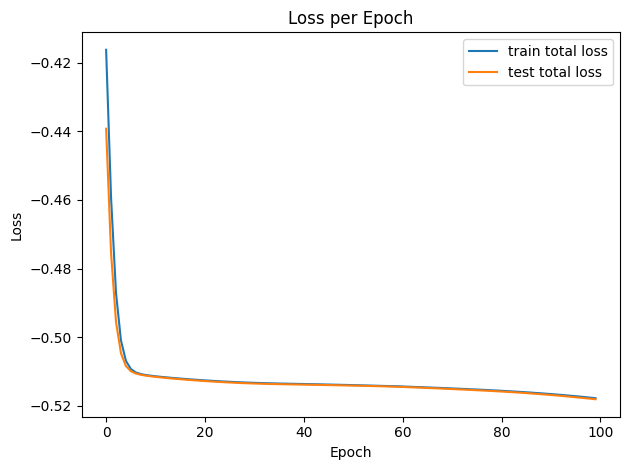

91
91
SIZE
91
2878
8
8
SIZE
8
2878
505
505
SIZE
505
2878
16
16
SIZE
16
2878
1
1
SIZE
1
2878
[[0.0, 1.0, 0.0, 1.0], [0.0, 1.0, 0.0, 1.0], [0.0, 0.9848993288590604, 0.015100671140939598, 1.0], [0.0, 0.9765100671140939, 0.02348993288590604, 1.0], [0.0, 0.9177852348993288, 0.08221476510067115, 1.0], [0.0, 0.8842281879194631, 0.11577181208053691, 1.0], [0.0, 0.7248322147651006, 0.2751677852348993, 1.0]]
attack1
True possitive:  0.0
True negative:  1.0
False possitive:  0.0
False negative:  1.0
True possitive:  0.0
True negative:  1.0
False possitive:  0.0
False negative:  1.0
True possitive:  0.0
True negative:  0.9848993288590604
False possitive:  0.015100671140939598
False negative:  1.0
True possitive:  0.0
True negative:  0.9765100671140939
False possitive:  0.02348993288590604
False negative:  1.0
True possitive:  0.0
True negative:  0.9177852348993288
False possitive:  0.08221476510067115
False negative:  1.0
True possitive:  0.0
True negative:  0.8842281879194631
False possitive:  0.

In [ ]:
input_dim = len(prep_data[0])
hidden_dim1 = 1000
hidden_dim2 = 400
hidden_dim3 = 150
latent_dim = 3
n_gmm = 1
lr = 1e-5
epochs = 100
lambda_energy=0.1
lambda_cov_diag=0.005
batch_size = 300

true_pos_arr=[[],[],[],[],[],[],[]]
false_pos_arr=[[],[],[],[],[],[],[]]
true_neg_arr=[[],[],[],[],[],[],[]]
false_neg_arr=[[],[],[],[],[],[],[]]
true_pos_arr2=[[],[],[],[],[],[],[]]
false_pos_arr2=[[],[],[],[],[],[],[]]
true_neg_arr2=[[],[],[],[],[],[],[]]
false_neg_arr2=[[],[],[],[],[],[],[]]

def mean(lst):
    if not lst:
        return None  # Handle empty list case
    return sum(lst) / len(lst)

def stats(example, attack, threshold):
  res=[]
  for thres in threshold:
    false_pos=len(torch.where(example >= thres)[0])/len(example)
    true_pos=len(torch.where(attack >= thres)[0])/len(attack)
    false_neg=len(torch.where(attack < thres)[0])/len(attack)
    true_neg=len(torch.where(example < thres)[0])/len(example)
    res.append([true_pos, true_neg, false_pos, false_neg])

  return res



def train_model(model, prep_data, optimizer, epochs):
  train_data, test_data = train_test_split(torch.tensor(prep_data, dtype=torch.float), test_size=0.25)
  train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=False)
  test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False)


  losses = train(model, train_loader, test_loader, optimizer, epochs)
  plot_losses(losses)
  model.eval()  # Set the model to evaluation mode
  with torch.no_grad():
    train_energy = model.get_energy(train_data)
    test_energy = model.get_energy(test_data)

    all_energy=np.concatenate((train_energy, test_energy), axis=0)

    threshold = [np.percentile(all_energy, 99.99),np.percentile(all_energy, 99.9),np.percentile(all_energy, 99.5),np.percentile(all_energy, 99),np.percentile(all_energy, 95),np.percentile(all_energy, 90),np.percentile(all_energy, 75)]

    with open('testdata16.json', 'r') as f:
      data = json.load(f)

    example_dataset=data
    with open('testdata.json', 'r') as f:
      data = json.load(f)

    dataset=data

    with open('testdata2.json', 'r') as f:
        data = json.load(f)

    dataset+=data
    with open('testdata3.json', 'r') as f:
        data = json.load(f)

    dataset+=data

    with open('testdata4.json', 'r') as f:
        data = json.load(f)

    dataset+=data

    with open('testdata5.json', 'r') as f:
        data = json.load(f)

    dataset+=data
    with open('testdata6.json', 'r') as f:
        data = json.load(f)

    dataset+=data
    with open('testdata7.json', 'r') as f:
        data = json.load(f)

    dataset+=data
    with open('testdata8.json', 'r') as f:
        data = json.load(f)

    dataset+=data
    with open('testdata9.json', 'r') as f:
        data = json.load(f)

    dataset+=data
    with open('testdata10.json', 'r') as f:
        data = json.load(f)

    dataset+=data
    example1=dataset
    exam0 = preprocess(example1)
    exam_fin,_=encode(exam0, maxL)
    ex0 = torch.tensor(exam_fin, dtype=torch.float)
    res0=model.get_energy(ex0)
    example1 = res0.detach()

    with open('testdata0.json', 'r') as f:
        data = json.load(f)

    example2=data
    exam2 = preprocess(example2)
    exam_fin2,_=encode(exam2, maxL)
    ex2 = torch.tensor(exam_fin2, dtype=torch.float)
    res1=model.get_energy(ex2)
    example2 = res1.detach()

    exam = preprocess(example_dataset)
    exam_fin, _=encode(exam, maxL)
    exam = torch.tensor(exam_fin, dtype=torch.float)
    res2=model.get_energy(exam)
    example = res2.detach()

    with open('attackdata.json', 'r') as f:
      data = json.load(f)
    anomally_dataset=data
    anom1 = preprocess(anomally_dataset)
    anom_fin,_=encode(anom1, maxL)
    anom = torch.tensor(anom_fin, dtype=torch.float)
    res1=model.get_energy(anom)
    attack = res1.detach()
    with open('attackdata2.json', 'r') as f:
      data = json.load(f)
    anomally_dataset2=data
    anom2 = preprocess(anomally_dataset2)
    anom_fin2,_=encode(anom2, maxL)
    anom2 = torch.tensor(anom_fin2, dtype=torch.float)
    res2=model.get_energy(anom2)
    attack2 = res2.detach()

    ftpn=stats(torch.cat((example1,example)), attack, threshold)
    ftpn2=stats(torch.cat((example2,example)), attack2, threshold)
    return ftpn, ftpn2
i=0
while(i<10):
  print("In i= ", i)
  model = DAGMM(input_dim, hidden_dim1, hidden_dim2, hidden_dim3, latent_dim, n_gmm)
  optimizer = optim.Adam(model.parameters(), lr=lr)
  results = train_model(model, prep_data, optimizer, epochs)
  count=0
  print(results[0])
  print("attack1")
  for res in results[0]:
    print("True possitive: ", res[0])
    print("True negative: ", res[1])
    print("False possitive: ", res[2])
    print("False negative: ", res[3])
    true_pos_arr[count].append(res[0])
    true_neg_arr[count].append(res[1])
    false_pos_arr[count].append(res[2])
    false_neg_arr[count].append(res[3])
    count+=1
  count=0
  print(results[1])
  print("attack2")
  for res in results[1]:
    print("True possitive: ", res[0])
    print("True negative: ", res[1])
    print("False possitive: ", res[2])
    print("False negative: ", res[3])
    true_pos_arr2[count].append(res[0])
    true_neg_arr2[count].append(res[1])
    false_pos_arr2[count].append(res[2])
    false_neg_arr2[count].append(res[3])
    count+=1
  i+=1
thresholds=[0.01, 0.1, 0.5, 1, 5, 10, 25]
print()
print("Results after 10 model trains in attack 1")
print("_____________________________")
count=0
for tr in thresholds:
  print("For threshold = ", tr)
  print("True possitive: ", mean(true_pos_arr[count]))
  print("False possitive: ", mean(false_pos_arr[count]))
  print("True negative: ", mean(true_neg_arr[count]))
  print("False negative: ", mean(false_neg_arr[count]))
  count+=1
print()
print("Results after 10 model trains in attack 2")
print("_____________________________")
count=0
for tr in thresholds:
  print("For threshold = ", tr)
  print("True possitive: ", mean(true_pos_arr2[count]))
  print("False possitive: ", mean(false_pos_arr2[count]))
  print("True negative: ", mean(true_neg_arr2[count]))
  print("False negative: ", mean(false_neg_arr2[count]))
  count+=1





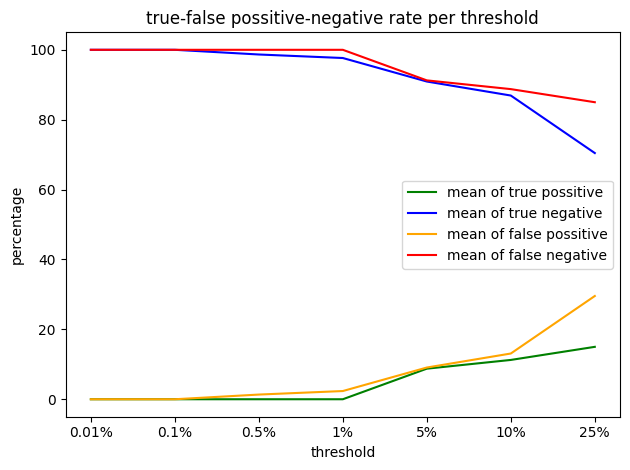

In [ ]:
  mtp=[]
  mfp=[]
  mtn=[]
  mfn=[]
  t=["0.01%", "0.1%", "0.5%", "1%", "5%", "10%", "25%"]
  count=0
  for tr in thresholds:
    mtp.append(mean(true_pos_arr[count])*100)
    mtn.append(mean(true_neg_arr[count])*100)
    mfp.append(mean(false_pos_arr[count])*100)
    mfn.append(mean(false_neg_arr[count])*100)
    count+=1

  plt.plot(t, mtp, label="mean of true possitive", c='green')
  plt.plot(t, mtn, label="mean of true negative", c='blue')
  plt.plot(t, mfp, label="mean of false possitive", c='orange')
  plt.plot(t, mfn, label="mean of false negative", c='red')
  plt.title('true-false possitive-negative rate per threshold')
  plt.xlabel('threshold')
  plt.ylabel('percentage')
  plt.legend()
  plt.tight_layout()
  # plt.ylim(loss_data[1][len(loss_data[0])-1]-2,loss_data[1][len(loss_data[0])-1]+2)
  plt.show()


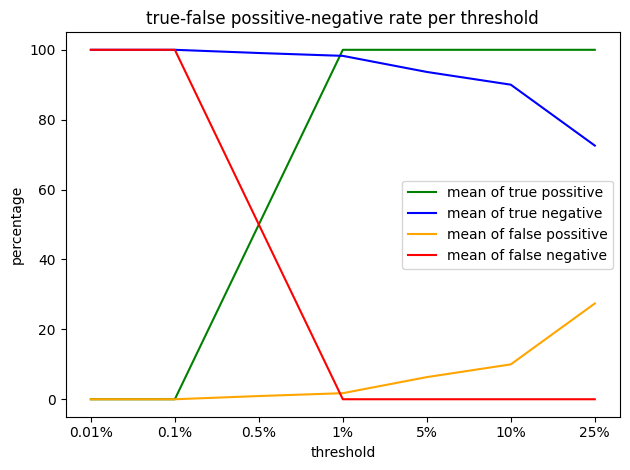

In [ ]:
  mtp2=[]
  mfp2=[]
  mtn2=[]
  mfn2=[]
  t=["0.01%", "0.1%", "0.5%", "1%", "5%", "10%", "25%"]
  count=0
  for tr in thresholds:
    mtp2.append(mean(true_pos_arr2[count])*100)
    mtn2.append(mean(true_neg_arr2[count])*100)
    mfp2.append(mean(false_pos_arr2[count])*100)
    mfn2.append(mean(false_neg_arr2[count])*100)
    count+=1

  plt.plot(t, mtp2, label="mean of true possitive", c='green')
  plt.plot(t, mtn2, label="mean of true negative", c='blue')
  plt.plot(t, mfp2, label="mean of false possitive", c='orange')
  plt.plot(t, mfn2, label="mean of false negative", c='red')
  plt.title('true-false possitive-negative rate per threshold')
  plt.xlabel('threshold')
  plt.ylabel('percentage')
  plt.legend()
  plt.tight_layout()
  # plt.ylim(loss_data[1][len(loss_data[0])-1]-2,loss_data[1][len(loss_data[0])-1]+2)
  plt.show()


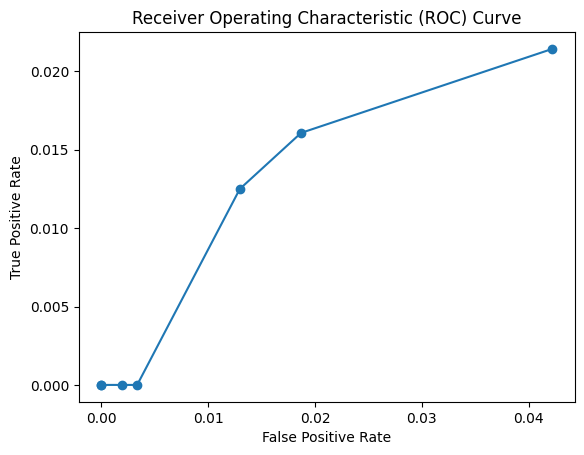

In [ ]:

total_positives = sum(mtp) + sum(mfn)
total_negatives = sum(mtn) + sum(mfp)

# Calculate TPR and FPR
TPR = [tp / total_positives for tp in mtp]
FPR = [fp / total_negatives for fp in mfp]

# Plotting the ROC curve
plt.plot(FPR, TPR, marker='o')


# Adding labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

# Displaying the plot
plt.show()

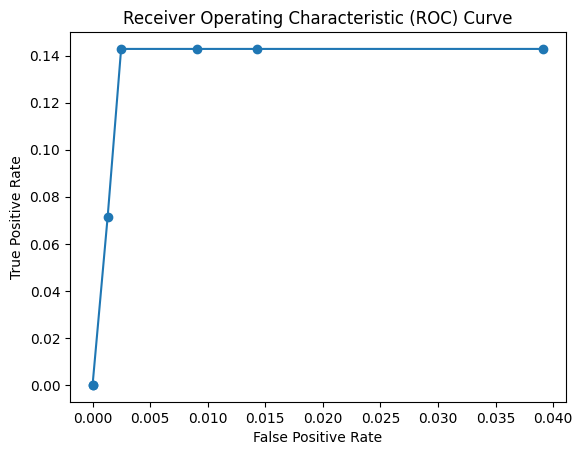

In [ ]:

total_positives = sum(mtp2) + sum(mfn2)
total_negatives = sum(mtn2) + sum(mfp2)

# Calculate TPR and FPR
TPR = [tp / total_positives for tp in mtp2]
FPR = [fp / total_negatives for fp in mfp2]

# Plotting the ROC curve
plt.plot(FPR, TPR, marker='o')


# Adding labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

# Displaying the plot
plt.show()

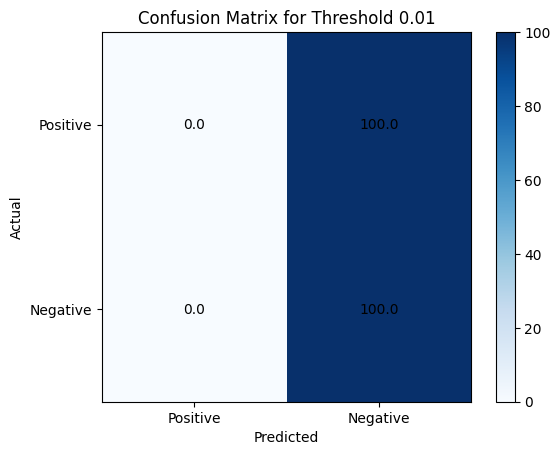

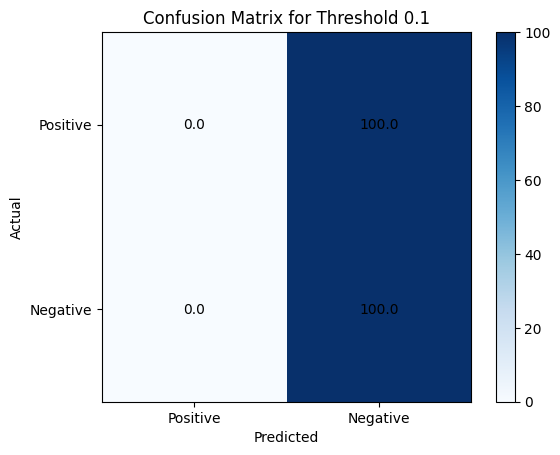

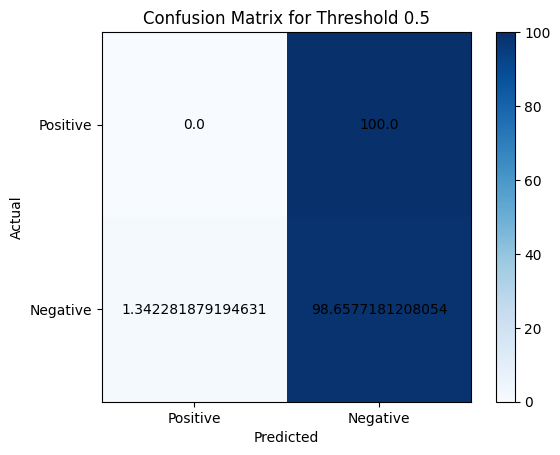

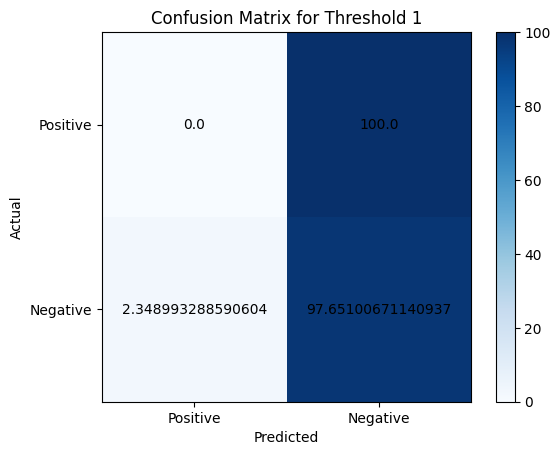

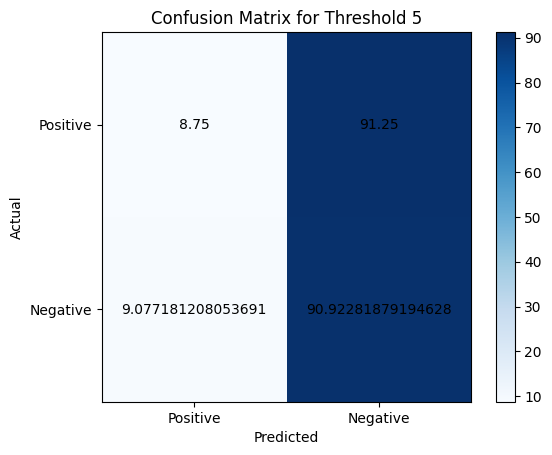

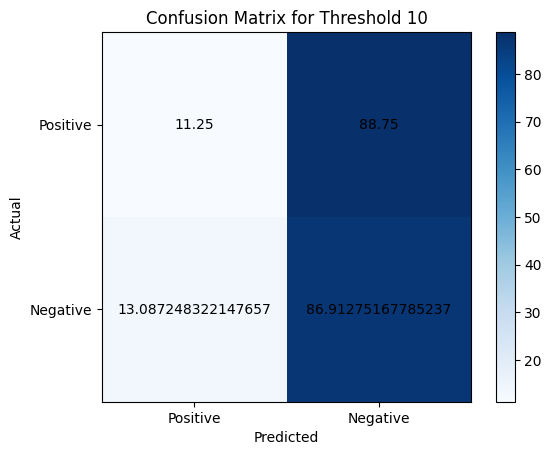

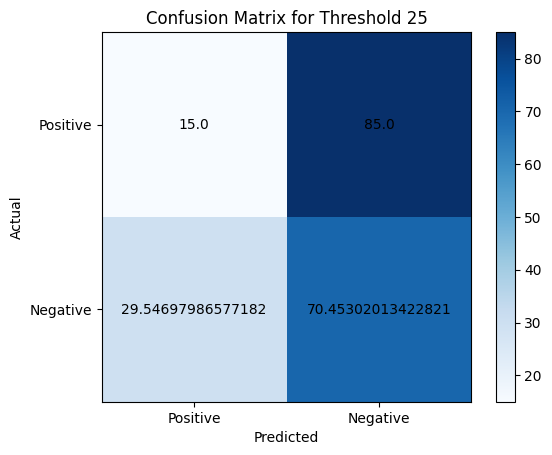

In [ ]:
# Sample percentages of TP, TN, FP, FN for different thresholds


for i, threshold in enumerate(thresholds):

    total_positives = mtp[i] + mfn[i]
    total_negatives = mtn[i] + mfp[i]

    # Calculate TP, TN, FP, FN
    TP = mtp[i] / 100 * total_positives
    TN = mtn[i] / 100 * total_negatives
    FP = mfp[i] / 100 * total_negatives
    FN = mfn[i] / 100 * total_positives

    # Creating confusion matrix
    confusion_matrix = np.array([[TP, FN], [FP, TN]])

    # Plotting the confusion matrix
    plt.figure()
    plt.imshow(confusion_matrix, cmap=plt.cm.Blues, interpolation='nearest')
    plt.colorbar()

    # Adding labels
    plt.title(f'Confusion Matrix for Threshold {threshold}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.xticks([0, 1], ['Positive', 'Negative'])
    plt.yticks([0, 1], ['Positive', 'Negative'])

    # Displaying the plot
    for i in range(len(confusion_matrix)):
        for j in range(len(confusion_matrix[0])):
            plt.text(j, i, str(confusion_matrix[i, j]), va='center', ha='center')

plt.show()


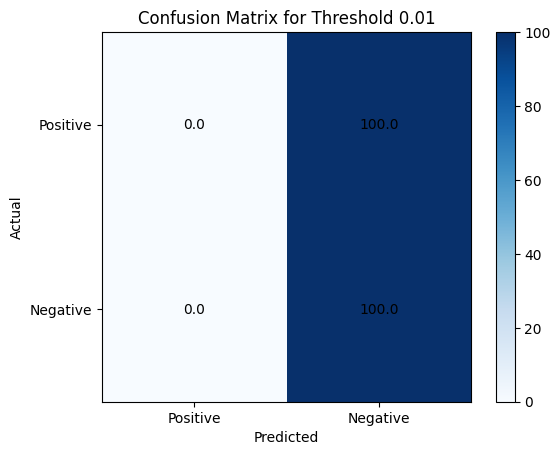

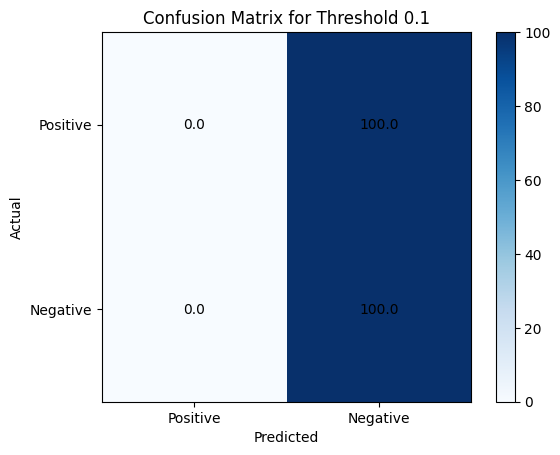

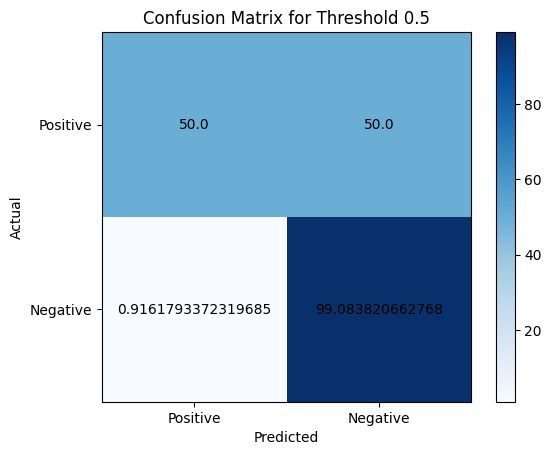

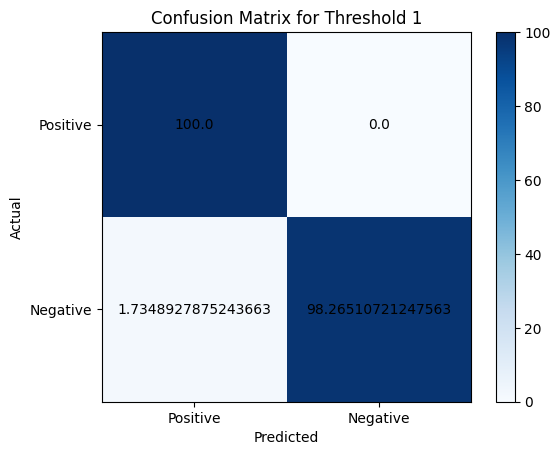

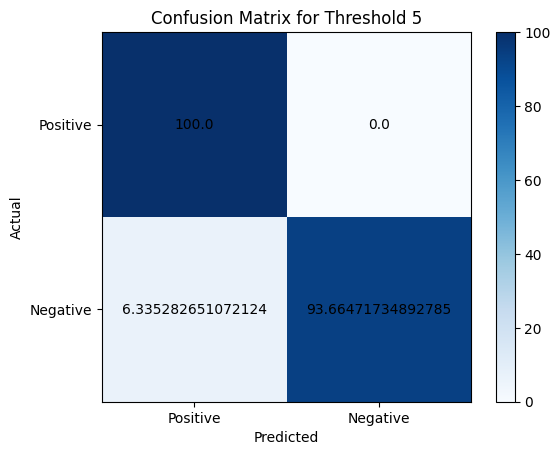

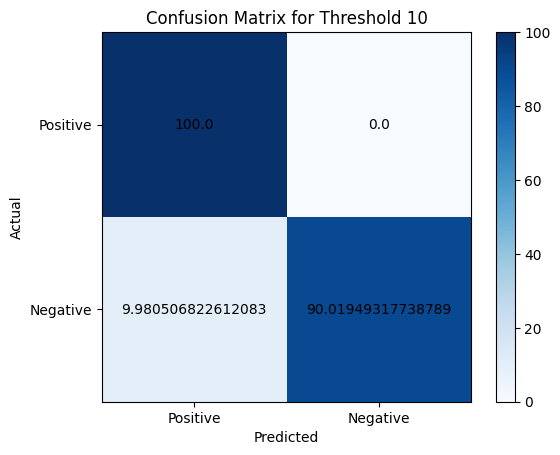

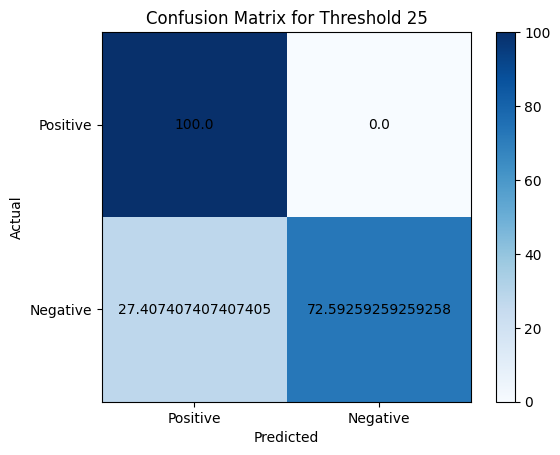

In [ ]:
# Sample percentages of TP, TN, FP, FN for different thresholds


for i, threshold in enumerate(thresholds):

    total_positives = mtp2[i] + mfn2[i]
    total_negatives = mtn2[i] + mfp2[i]

    # Calculate TP, TN, FP, FN
    TP = mtp2[i] / 100 * total_positives
    TN = mtn2[i] / 100 * total_negatives
    FP = mfp2[i] / 100 * total_negatives
    FN = mfn2[i] / 100 * total_positives

    # Creating confusion matrix
    confusion_matrix = np.array([[TP, FN], [FP, TN]])

    # Plotting the confusion matrix
    plt.figure()
    plt.imshow(confusion_matrix, cmap=plt.cm.Blues, interpolation='nearest')
    plt.colorbar()

    # Adding labels
    plt.title(f'Confusion Matrix for Threshold {threshold}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.xticks([0, 1], ['Positive', 'Negative'])
    plt.yticks([0, 1], ['Positive', 'Negative'])

    # Displaying the plot
    for i in range(len(confusion_matrix)):
        for j in range(len(confusion_matrix[0])):
            plt.text(j, i, str(confusion_matrix[i, j]), va='center', ha='center')

plt.show()


###Isolation Forest


In [16]:
with open('testdata16.json', 'r') as f:
  data = json.load(f)

example_dataset=data
with open('testdata.json', 'r') as f:
  data = json.load(f)

dataset=data

with open('testdata2.json', 'r') as f:
    data = json.load(f)

dataset+=data
with open('testdata3.json', 'r') as f:
    data = json.load(f)

dataset+=data

with open('testdata4.json', 'r') as f:
    data = json.load(f)

dataset+=data

with open('testdata5.json', 'r') as f:
    data = json.load(f)

dataset+=data
with open('testdata6.json', 'r') as f:
    data = json.load(f)

dataset+=data
with open('testdata7.json', 'r') as f:
    data = json.load(f)

dataset+=data
with open('testdata8.json', 'r') as f:
    data = json.load(f)

dataset+=data
with open('testdata9.json', 'r') as f:
    data = json.load(f)

dataset+=data
with open('testdata10.json', 'r') as f:
    data = json.load(f)

dataset+=data
example1=dataset
exam0 = preprocess(example1)
exam_fin,_=encode(exam0, maxL)
ex0 = torch.tensor(exam_fin, dtype=torch.float)

with open('testdata0.json', 'r') as f:
    data = json.load(f)

example2=data
exam2 = preprocess(example2)
exam_fin2,_=encode(exam2, maxL)
ex2 = torch.tensor(exam_fin2, dtype=torch.float)

exam = preprocess(example_dataset)
exam_fin, _=encode(exam, maxL)
exam = torch.tensor(exam_fin, dtype=torch.float)


with open('attackdata.json', 'r') as f:
  data = json.load(f)
anomally_dataset=data
anom1 = preprocess(anomally_dataset)
anom_fin,_=encode(anom1, maxL)
anom = torch.tensor(anom_fin, dtype=torch.float)

with open('attackdata2.json', 'r') as f:
  data = json.load(f)
anomally_dataset2=data
anom2 = preprocess(anomally_dataset2)
anom_fin2,_=encode(anom2, maxL)
anom2 = torch.tensor(anom_fin2, dtype=torch.float)

example=torch.cat((ex0,exam))
examp2=torch.cat((ex2,exam))
print(example.size())
print(examp2.size())

91
91
SIZE
91
2878
8
8
SIZE
8
2878
505
505
SIZE
505
2878
16
16
SIZE
16
2878
1
1
SIZE
1
2878
torch.Size([596, 2878])
torch.Size([513, 2878])


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split



true_pos_arr=[[],[],[],[],[],[],[]]
false_pos_arr=[[],[],[],[],[],[],[]]
true_neg_arr=[[],[],[],[],[],[],[]]
false_neg_arr=[[],[],[],[],[],[],[]]

true_pos_arr2=[[],[],[],[],[],[],[]]
false_pos_arr2=[[],[],[],[],[],[],[]]
true_neg_arr2=[[],[],[],[],[],[],[]]
false_neg_arr2=[[],[],[],[],[],[],[]]

def mean(lst):
    if not lst:
        return None  # Handle empty list case
    return sum(lst) / len(lst)
clf = IsolationForest(contamination=0.01, max_samples='auto', max_features = 1000 , n_estimators=1000, bootstrap=False)


# Parameters

batch_size = 64
t=[0.01, 0.1, 0.5, 1, 5, 10, 25]
i=0
while i<10 :
  train_data, test_data = train_test_split(torch.tensor(prep_data, dtype=torch.float), test_size=0.25)
  # Extracting numpy arrays from torch tensors
  train_array = train_data.numpy()
  test_array = test_data.numpy()


  # Fit the model on training data
  clf.fit(train_array)

  # Get anomaly scores for test data
  test_energy=clf.decision_function(test_array)
  train_energy=clf.decision_function(train_array)
  all_energy=np.concatenate((train_energy, test_energy), axis=0)

  print("in i=", i)
  count=0
  for th in t:
    threshold = np.percentile(all_energy, th)


    attack1 = torch.tensor(clf.decision_function(anom.numpy()))
    example1 = torch.tensor(clf.decision_function(example.numpy()))

    attack2 = torch.tensor(clf.decision_function(anom2.numpy()))
    example2 = torch.tensor(clf.decision_function(examp2.numpy()))


    false_pos=len(torch.where(example1 <= threshold)[0])/len(example1)
    true_pos=len(torch.where(attack1 <= threshold)[0])/len(attack1)
    false_neg=len(torch.where(attack1 > threshold)[0])/len(attack1)
    true_neg=len(torch.where(example1 > threshold)[0])/len(example1)
    print("first")
    print('true positive: ', true_pos)
    print('false positive: ', false_pos)
    print('true negative: ', true_neg)
    print('false negative: ', false_neg)
    true_pos_arr[count].append(true_pos)
    true_neg_arr[count].append(true_neg)
    false_pos_arr[count].append(false_pos)
    false_neg_arr[count].append(false_neg)

    false_pos=len(torch.where(example2 <= threshold)[0])/len(example2)
    true_pos=len(torch.where(attack2 <= threshold)[0])/len(attack2)
    false_neg=len(torch.where(attack2 > threshold)[0])/len(attack2)
    true_neg=len(torch.where(example2 > threshold)[0])/len(example2)
    print("second")
    print('true positive: ', true_pos)
    print('false positive: ', false_pos)
    print('true negative: ', true_neg)
    print('false negative: ', false_neg)
    true_pos_arr2[count].append(true_pos)
    true_neg_arr2[count].append(true_neg)
    false_pos_arr2[count].append(false_pos)
    false_neg_arr2[count].append(false_neg)
    count+=1
  i+=1

print("Results after 10 model trains")
print("_____________________________")
print("First Attack")
print("=============================")
count=0
thresholds=["0.01%", "0.1%", "0.5%", "1%", "5%", "10%", "25%"]
for tr in thresholds:
  print("For threshold = ", tr)
  print("true possitive: ", mean(true_pos_arr[count]))
  print("false possitive: ", mean(false_pos_arr[count]))
  print("true negative: ", mean(true_neg_arr[count]))
  print("false negative: ", mean(false_neg_arr[count]))
  count+=1
print()
print("Second Attack")
print("=============================")
count=0
thresholds=["0.01%", "0.1%", "0.5%", "1%", "5%", "10%", "25%"]
for tr in thresholds:
  print("For threshold = ", tr)
  print("true possitive: ", mean(true_pos_arr2[count]))
  print("false possitive: ", mean(false_pos_arr2[count]))
  print("true negative: ", mean(true_neg_arr2[count]))
  print("false negative: ", mean(false_neg_arr2[count]))
  count+=1


in i= 0
first
true positive:  0.0
false positive:  0.0
true negative:  1.0
false negative:  1.0
second
true positive:  0.0
false positive:  0.0
true negative:  1.0
false negative:  1.0
first
true positive:  0.0
false positive:  0.0016778523489932886
true negative:  0.9983221476510067
false negative:  1.0
second
true positive:  1.0
false positive:  0.001949317738791423
true negative:  0.9980506822612085
false negative:  0.0
first
true positive:  0.0
false positive:  0.0016778523489932886
true negative:  0.9983221476510067
false negative:  1.0
second
true positive:  1.0
false positive:  0.001949317738791423
true negative:  0.9980506822612085
false negative:  0.0
first
true positive:  0.0
false positive:  0.0016778523489932886
true negative:  0.9983221476510067
false negative:  1.0
second
true positive:  1.0
false positive:  0.001949317738791423
true negative:  0.9980506822612085
false negative:  0.0
first
true positive:  0.0
false positive:  0.02348993288590604
true negative:  0.97651006

###One class SVM

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split


true_pos_arr=[[],[],[],[],[],[],[]]
false_pos_arr=[[],[],[],[],[],[],[]]
true_neg_arr=[[],[],[],[],[],[],[]]
false_neg_arr=[[],[],[],[],[],[],[]]

true_pos_arr2=[[],[],[],[],[],[],[]]
false_pos_arr2=[[],[],[],[],[],[],[]]
true_neg_arr2=[[],[],[],[],[],[],[]]
false_neg_arr2=[[],[],[],[],[],[],[]]

def mean(lst):
    if not lst:
        return None  # Handle empty list case
    return sum(lst) / len(lst)


clf = OneClassSVM(nu=0.01, kernel="rbf", gamma=0.1)  # You can adjust the nu parameter as needed


batch_size = 64
t=[0.01, 0.1, 0.5, 1, 5, 10, 25]
i=0
while i<10 :
  train_data, test_data = train_test_split(torch.tensor(prep_data, dtype=torch.float), test_size=0.25)
  # Extracting numpy arrays from torch tensors
  train_array = train_data.numpy()
  test_array = test_data.numpy()


  # Fit the model on training data
  clf.fit(train_array)

  # Get anomaly scores for test data
  test_energy=clf.decision_function(test_array)
  train_energy=clf.decision_function(train_array)
  all_energy=np.concatenate((train_energy, test_energy), axis=0)

  print("in i=", i)
  count=0
  for th in t:
    threshold = np.percentile(all_energy, th)


    attack1 = torch.tensor(clf.decision_function(anom.numpy()))
    example1 = torch.tensor(clf.decision_function(example.numpy()))

    attack2 = torch.tensor(clf.decision_function(anom2.numpy()))
    example2 = torch.tensor(clf.decision_function(examp2.numpy()))


    false_pos=len(torch.where(example1 <= threshold)[0])/len(example1)
    true_pos=len(torch.where(attack1 <= threshold)[0])/len(attack1)
    false_neg=len(torch.where(attack1 > threshold)[0])/len(attack1)
    true_neg=len(torch.where(example1 > threshold)[0])/len(example1)
    print("first")
    print('true positive: ', true_pos)
    print('false positive: ', false_pos)
    print('true negative: ', true_neg)
    print('false negative: ', false_neg)
    true_pos_arr[count].append(true_pos)
    true_neg_arr[count].append(true_neg)
    false_pos_arr[count].append(false_pos)
    false_neg_arr[count].append(false_neg)

    false_pos=len(torch.where(example2 <= threshold)[0])/len(example2)
    true_pos=len(torch.where(attack2 <= threshold)[0])/len(attack2)
    false_neg=len(torch.where(attack2 > threshold)[0])/len(attack2)
    true_neg=len(torch.where(example2 > threshold)[0])/len(example2)
    print("second")
    print('true positive: ', true_pos)
    print('false positive: ', false_pos)
    print('true negative: ', true_neg)
    print('false negative: ', false_neg)
    true_pos_arr2[count].append(true_pos)
    true_neg_arr2[count].append(true_neg)
    false_pos_arr2[count].append(false_pos)
    false_neg_arr2[count].append(false_neg)
    count+=1
  i+=1

print("Results after 10 model trains")
print("_____________________________")
print("First Attack")
print("=============================")
count=0
thresholds=["0.01%", "0.1%", "0.5%", "1%", "5%", "10%", "25%"]
for tr in thresholds:
  print("For threshold = ", tr)
  print("true possitive: ", mean(true_pos_arr[count]))
  print("false possitive: ", mean(false_pos_arr[count]))
  print("true negative: ", mean(true_neg_arr[count]))
  print("false negative: ", mean(false_neg_arr[count]))
  count+=1
print()
print("Second Attack")
print("=============================")
count=0
thresholds=["0.01%", "0.1%", "0.5%", "1%", "5%", "10%", "25%"]
for tr in thresholds:
  print("For threshold = ", tr)
  print("true possitive: ", mean(true_pos_arr2[count]))
  print("false possitive: ", mean(false_pos_arr2[count]))
  print("true negative: ", mean(true_neg_arr2[count]))
  print("false negative: ", mean(false_neg_arr2[count]))
  count+=1


in i= 0
first
true positive:  0.0
false positive:  0.0016778523489932886
true negative:  0.9983221476510067
false negative:  1.0
second
true positive:  1.0
false positive:  0.001949317738791423
true negative:  0.9980506822612085
false negative:  0.0
first
true positive:  0.0
false positive:  0.0016778523489932886
true negative:  0.9983221476510067
false negative:  1.0
second
true positive:  1.0
false positive:  0.001949317738791423
true negative:  0.9980506822612085
false negative:  0.0
first
true positive:  0.0
false positive:  0.018456375838926176
true negative:  0.9815436241610739
false negative:  1.0
second
true positive:  1.0
false positive:  0.01364522417153996
true negative:  0.98635477582846
false negative:  0.0
first
true positive:  0.5625
false positive:  0.06543624161073826
true negative:  0.9345637583892618
false negative:  0.4375
second
true positive:  1.0
false positive:  0.06237816764132553
true negative:  0.9376218323586745
false negative:  0.0
first
true positive:  1.0

###SGD One Class SVM

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDOneClassSVM
from sklearn.model_selection import train_test_split

#
true_pos_arr=[[],[],[],[],[],[],[]]
false_pos_arr=[[],[],[],[],[],[],[]]
true_neg_arr=[[],[],[],[],[],[],[]]
false_neg_arr=[[],[],[],[],[],[],[]]

true_pos_arr2=[[],[],[],[],[],[],[]]
false_pos_arr2=[[],[],[],[],[],[],[]]
true_neg_arr2=[[],[],[],[],[],[],[]]
false_neg_arr2=[[],[],[],[],[],[],[]]

def mean(lst):
    if not lst:
        return None  # Handle empty list case
    return sum(lst) / len(lst)

clf = SGDOneClassSVM(nu=0.01, learning_rate='optimal', average=True)  # You can adjust the nu parameter as needed

batch_size = 256
t=[0.01, 0.1, 0.5, 1, 5, 10, 25]
i=0
while i<10 :
  train_data, test_data = train_test_split(torch.tensor(prep_data, dtype=torch.float), test_size=0.25)
  # Extracting numpy arrays from torch tensors
  train_array = train_data.numpy()
  test_array = test_data.numpy()


  # Fit the model on training data
  clf.fit(train_array)

  # Get anomaly scores for test data
  test_energy=clf.decision_function(test_array)
  train_energy=clf.decision_function(train_array)
  all_energy=np.concatenate((train_energy, test_energy), axis=0)

  print("in i=", i)
  count=0
  for th in t:
    threshold = np.percentile(all_energy, th)


    attack1 = torch.tensor(clf.decision_function(anom.numpy()))
    example1 = torch.tensor(clf.decision_function(example.numpy()))

    attack2 = torch.tensor(clf.decision_function(anom2.numpy()))
    example2 = torch.tensor(clf.decision_function(examp2.numpy()))


    false_pos=len(torch.where(example1 <= threshold)[0])/len(example1)
    true_pos=len(torch.where(attack1 <= threshold)[0])/len(attack1)
    false_neg=len(torch.where(attack1 > threshold)[0])/len(attack1)
    true_neg=len(torch.where(example1 > threshold)[0])/len(example1)
    print("first")
    print('true positive: ', true_pos)
    print('false positive: ', false_pos)
    print('true negative: ', true_neg)
    print('false negative: ', false_neg)
    true_pos_arr[count].append(true_pos)
    true_neg_arr[count].append(true_neg)
    false_pos_arr[count].append(false_pos)
    false_neg_arr[count].append(false_neg)

    false_pos=len(torch.where(example2 <= threshold)[0])/len(example2)
    true_pos=len(torch.where(attack2 <= threshold)[0])/len(attack2)
    false_neg=len(torch.where(attack2 > threshold)[0])/len(attack2)
    true_neg=len(torch.where(example2 > threshold)[0])/len(example2)
    print("second")
    print('true positive: ', true_pos)
    print('false positive: ', false_pos)
    print('true negative: ', true_neg)
    print('false negative: ', false_neg)
    true_pos_arr2[count].append(true_pos)
    true_neg_arr2[count].append(true_neg)
    false_pos_arr2[count].append(false_pos)
    false_neg_arr2[count].append(false_neg)
    count+=1
  i+=1

print("Results after 10 model trains")
print("_____________________________")
print("First Attack")
print("=============================")
count=0
thresholds=["0.01%", "0.1%", "0.5%", "1%", "5%", "10%", "25%"]
for tr in thresholds:
  print("For threshold = ", tr)
  print("true possitive: ", mean(true_pos_arr[count]))
  print("false possitive: ", mean(false_pos_arr[count]))
  print("true negative: ", mean(true_neg_arr[count]))
  print("false negative: ", mean(false_neg_arr[count]))
  count+=1
print()
print("Second Attack")
print("=============================")
count=0
thresholds=["0.01%", "0.1%", "0.5%", "1%", "5%", "10%", "25%"]
for tr in thresholds:
  print("For threshold = ", tr)
  print("true possitive: ", mean(true_pos_arr2[count]))
  print("false possitive: ", mean(false_pos_arr2[count]))
  print("true negative: ", mean(true_neg_arr2[count]))
  print("false negative: ", mean(false_neg_arr2[count]))
  count+=1

in i= 0
first
true positive:  0.0
false positive:  0.0
true negative:  1.0
false negative:  1.0
second
true positive:  0.0
false positive:  0.0
true negative:  1.0
false negative:  1.0
first
true positive:  0.0
false positive:  0.0
true negative:  1.0
false negative:  1.0
second
true positive:  0.0
false positive:  0.0
true negative:  1.0
false negative:  1.0
first
true positive:  0.0
false positive:  0.015100671140939598
true negative:  0.9848993288590604
false negative:  1.0
second
true positive:  0.0
false positive:  0.011695906432748537
true negative:  0.9883040935672515
false negative:  1.0
first
true positive:  0.0
false positive:  0.02348993288590604
true negative:  0.9765100671140939
false negative:  1.0
second
true positive:  0.0
false positive:  0.015594541910331383
true negative:  0.9844054580896686
false negative:  1.0
first
true positive:  0.0
false positive:  0.06375838926174497
true negative:  0.9362416107382551
false negative:  1.0
second
true positive:  0.0
false posit

###Autoencoder

In [17]:
import torch.nn as nn


true_pos_arr=[[],[],[],[],[],[],[]]
false_pos_arr=[[],[],[],[],[],[],[]]
true_neg_arr=[[],[],[],[],[],[],[]]
false_neg_arr=[[],[],[],[],[],[],[]]

true_pos_arr2=[[],[],[],[],[],[],[]]
false_pos_arr2=[[],[],[],[],[],[],[]]
true_neg_arr2=[[],[],[],[],[],[],[]]
false_neg_arr2=[[],[],[],[],[],[],[]]

def mean(lst):
    if not lst:
        return None  # Handle empty list case
    return sum(lst) / len(lst)


class AE(nn.Module):
    def __init__(self, input_dim):
        super(AE, self).__init__()
        self.enc = nn.Sequential(
            nn.Linear(input_dim, 400),
            nn.Tanh(),
            nn.Linear(400, 200),
            nn.Tanh(),
            nn.Linear(200, 100),
            nn.Tanh(),
            nn.Linear(100, 50),
            nn.Tanh(),
            nn.Linear(50, 25),
            nn.Tanh(),
            nn.Linear(25, 12),
        )
        self.dec = nn.Sequential(
            nn.Linear(12, 25),
            nn.Tanh(),
            nn.Linear(25, 50),
            nn.Tanh(),
            nn.Linear(50, 100),
            nn.Tanh(),
            nn.Linear(100, 200),
            nn.Tanh(),
            nn.Linear(200, 400),
            nn.Tanh(),
            nn.Linear(400, input_dim),
        )
    def forward(self, x):
        encode = self.enc(x)
        decode = self.dec(encode)
        return decode

lr = 6.0         # learning rate
w_d = 1e-4        # weight decay
epochs = 50

prep_data_tensor = torch.tensor(prep_data, dtype=torch.float32)
input_dim = prep_data_tensor.shape[1]
model = AE(input_dim)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr, weight_decay=w_d)

t=[0.01, 0.1, 0.5, 1, 5, 10, 25]
i=0
while i<10 :
  train_data, test_data = train_test_split(prep_data_tensor, test_size=0.25)
  train_losses = []
  test_losses = []

  for epoch in range(epochs):
      # Forward pass and compute training loss
      model.train()
      sample = model(train_data)
      train_loss = criterion(train_data, sample)
      optimizer.zero_grad()
      train_loss.backward()
      optimizer.step()

      # Compute testing loss
      model.eval()
      with torch.no_grad():
          test_outputs = model(test_data)
          test_loss = criterion(test_outputs, test_data)

      # Print progress and store losses
      if (epoch+1) % 10 == 0:
          print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {train_loss.item():.4f}, Test Loss: {test_loss.item():.4f}')
      train_losses.append(train_loss.item())
      test_losses.append(test_loss.item())

  def reconstruction_loss(input_data, output_data):
      return torch.mean((input_data - output_data)**2, axis=1)


  # Calculate reconstruction error for each data point in the test set
  def get_energy(data):
    with torch.no_grad():
        reconstructed_data = model(data)
        reconstruction_errors = reconstruction_loss(data, reconstructed_data).detach().numpy()
    return reconstruction_errors

  # Get anomaly scores for test data
  test_energy=get_energy(train_data)
  train_energy=get_energy(test_data)
  all_energy=np.concatenate((train_energy, test_energy), axis=0)
  count=0
  for th in t:
    threshold = np.percentile(all_energy, 100-th)

    normal_energy=torch.cat((torch.tensor(train_energy), torch.tensor(test_energy)), dim=0)

    attack1 = torch.tensor(get_energy(anom))
    example1 = torch.tensor(get_energy(example))

    attack2 = torch.tensor(get_energy(anom2))
    example2 = torch.tensor(get_energy(examp2))

    false_pos=len(torch.where(example1 >= threshold)[0])/len(example1)
    true_pos=len(torch.where(attack1 >= threshold)[0])/len(attack1)
    false_neg=len(torch.where(attack1 < threshold)[0])/len(attack1)
    true_neg=len(torch.where(example1 < threshold)[0])/len(example1)
    print("first")
    print('true positive: ', true_pos)
    print('false positive: ', false_pos)
    print('true negative: ', true_neg)
    print('false negative: ', false_neg)
    true_pos_arr[count].append(true_pos)
    true_neg_arr[count].append(true_neg)
    false_pos_arr[count].append(false_pos)
    false_neg_arr[count].append(false_neg)

    false_pos=len(torch.where(example2 >= threshold)[0])/len(example2)
    true_pos=len(torch.where(attack2 >= threshold)[0])/len(attack2)
    false_neg=len(torch.where(attack2 < threshold)[0])/len(attack2)
    true_neg=len(torch.where(example2 < threshold)[0])/len(example2)
    print("second")
    print('true positive: ', true_pos)
    print('false positive: ', false_pos)
    print('true negative: ', true_neg)
    print('false negative: ', false_neg)
    true_pos_arr2[count].append(true_pos)
    true_neg_arr2[count].append(true_neg)
    false_pos_arr2[count].append(false_pos)
    false_neg_arr2[count].append(false_neg)
    count+=1
  i+=1

print("Results after 10 model trains")
print("_____________________________")
print("First Attack")
print("=============================")
count=0
thresholds=["0.01%", "0.1%", "0.5%", "1%", "5%", "10%", "25%"]
for tr in thresholds:
  print("For threshold = ", tr)
  print("true possitive: ", mean(true_pos_arr[count]))
  print("false possitive: ", mean(false_pos_arr[count]))
  print("true negative: ", mean(true_neg_arr[count]))
  print("false negative: ", mean(false_neg_arr[count]))
  count+=1
print()
print("Second Attack")
print("=============================")
count=0
thresholds=["0.01%", "0.1%", "0.5%", "1%", "5%", "10%", "25%"]
for tr in thresholds:
  print("For threshold = ", tr)
  print("true possitive: ", mean(true_pos_arr2[count]))
  print("false possitive: ", mean(false_pos_arr2[count]))
  print("true negative: ", mean(true_neg_arr2[count]))
  print("false negative: ", mean(false_neg_arr2[count]))
  count+=1


Epoch [10/50], Train Loss: 0.0302, Test Loss: 0.0302
Epoch [20/50], Train Loss: 0.0274, Test Loss: 0.0273
Epoch [30/50], Train Loss: 0.0243, Test Loss: 0.0243
Epoch [40/50], Train Loss: 0.0216, Test Loss: 0.0216
Epoch [50/50], Train Loss: 0.0198, Test Loss: 0.0199
first
true positive:  0.0
false positive:  0.0016778523489932886
true negative:  0.9983221476510067
false negative:  1.0
second
true positive:  0.0
false positive:  0.001949317738791423
true negative:  0.9980506822612085
false negative:  1.0
first
true positive:  0.0
false positive:  0.0016778523489932886
true negative:  0.9983221476510067
false negative:  1.0
second
true positive:  1.0
false positive:  0.001949317738791423
true negative:  0.9980506822612085
false negative:  0.0
first
true positive:  0.0
false positive:  0.0016778523489932886
true negative:  0.9983221476510067
false negative:  1.0
second
true positive:  1.0
false positive:  0.001949317738791423
true negative:  0.9980506822612085
false negative:  0.0
first
tru

###Recursive Autoencoder

In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

true_pos_arr=[[],[],[],[],[],[],[]]
false_pos_arr=[[],[],[],[],[],[],[]]
true_neg_arr=[[],[],[],[],[],[],[]]
false_neg_arr=[[],[],[],[],[],[],[]]

true_pos_arr2=[[],[],[],[],[],[],[]]
false_pos_arr2=[[],[],[],[],[],[],[]]
true_neg_arr2=[[],[],[],[],[],[],[]]
false_neg_arr2=[[],[],[],[],[],[],[]]

def mean(lst):
    if not lst:
        return None  # Handle empty list case
    return sum(lst) / len(lst)

class LSTMAutoencoder(nn.Module):
  def __init__(self, input_dim, hidden_dim):
    super(LSTMAutoencoder, self).__init__()
    self.encoder = nn.LSTM(input_dim, hidden_dim, num_layers=1, batch_first=True)
    self.decoder = nn.LSTM(hidden_dim, input_dim, num_layers=1, batch_first=True)

  def forward(self, x):
    encoded, (h_n, c_n) = self.encoder(x)
    decoded, _ = self.decoder(encoded)
    return encoded, decoded


# Function to calculate reconstruction loss for each data point separately
def reconstruction_loss(input_data, output_data):
    return torch.mean((input_data - output_data[1])**2, axis=1)


# Prepare data (assuming prep_data is your dataset)
prep_data_tensor = torch.tensor(prep_data, dtype=torch.float32)
input_dim = prep_data_tensor.shape[1]  # Input dimension
print(input_dim)
num_epochs = 10
learning_rate = 1e-4
model = LSTMAutoencoder(input_dim, 128)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

t=[0.01, 0.1, 0.5, 1, 5, 10, 25]
i=0
while i<10 :
  train_data, test_data = train_test_split(prep_data_tensor, test_size=0.25)

  train_losses = []
  test_losses = []

  # Training the autoencoder
  for epoch in range(num_epochs):
      # Forward pass and compute training loss
      model.train()
      outputs = model(train_data)[1]
      train_loss = criterion(outputs, train_data)

      # Backward pass and optimization
      optimizer.zero_grad()
      train_loss.backward()
      optimizer.step()

      # Compute testing loss
      model.eval()
      with torch.no_grad():
          test_outputs = model(test_data)[1]
          test_loss = criterion(test_outputs, test_data)

      # Print progress and store losses
      if (epoch+1) % 10 == 0:
          print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss.item():.4f}, Test Loss: {test_loss.item():.4f}')
      train_losses.append(train_loss.item())
      test_losses.append(test_loss.item())

  # Calculate reconstruction error for each data point in the test set
  def get_energy(data):
    with torch.no_grad():
        reconstructed_data = model(data)
        reconstruction_errors = reconstruction_loss(data, reconstructed_data).detach().numpy()
    return reconstruction_errors

  # Get anomaly scores for test data
  test_energy=get_energy(train_data)
  train_energy=get_energy(test_data)
  all_energy=np.concatenate((train_energy, test_energy), axis=0)

  count=0
  for th in t:
    threshold = np.percentile(all_energy, 100-th)

    attack1 = torch.tensor(get_energy(anom))
    example1 = torch.tensor(get_energy(example))

    attack2 = torch.tensor(get_energy(anom2))
    example2 = torch.tensor(get_energy(examp2))

    false_pos=len(torch.where(example1 >= threshold)[0])/len(example1)
    true_pos=len(torch.where(attack1 >= threshold)[0])/len(attack1)
    false_neg=len(torch.where(attack1 < threshold)[0])/len(attack1)
    true_neg=len(torch.where(example1 < threshold)[0])/len(example1)
    print("first")
    print('true positive: ', true_pos)
    print('false positive: ', false_pos)
    print('true negative: ', true_neg)
    print('false negative: ', false_neg)
    true_pos_arr[count].append(true_pos)
    true_neg_arr[count].append(true_neg)
    false_pos_arr[count].append(false_pos)
    false_neg_arr[count].append(false_neg)

    false_pos=len(torch.where(example2 >= threshold)[0])/len(example2)
    true_pos=len(torch.where(attack2 >= threshold)[0])/len(attack2)
    false_neg=len(torch.where(attack2 < threshold)[0])/len(attack2)
    true_neg=len(torch.where(example2 < threshold)[0])/len(example2)
    print("second")
    print('true positive: ', true_pos)
    print('false positive: ', false_pos)
    print('true negative: ', true_neg)
    print('false negative: ', false_neg)
    true_pos_arr2[count].append(true_pos)
    true_neg_arr2[count].append(true_neg)
    false_pos_arr2[count].append(false_pos)
    false_neg_arr2[count].append(false_neg)
    count+=1
  i+=1

print("Results after 10 model trains")
print("_____________________________")
print("First Attack")
print("=============================")
count=0
thresholds=["0.01%", "0.1%", "0.5%", "1%", "5%", "10%", "25%"]
for tr in thresholds:
  print("For threshold = ", tr)
  print("true possitive: ", mean(true_pos_arr[count]))
  print("false possitive: ", mean(false_pos_arr[count]))
  print("true negative: ", mean(true_neg_arr[count]))
  print("false negative: ", mean(false_neg_arr[count]))
  count+=1
print()
print("Second Attack")
print("=============================")
count=0
thresholds=["0.01%", "0.1%", "0.5%", "1%", "5%", "10%", "25%"]
for tr in thresholds:
  print("For threshold = ", tr)
  print("true possitive: ", mean(true_pos_arr2[count]))
  print("false possitive: ", mean(false_pos_arr2[count]))
  print("true negative: ", mean(true_neg_arr2[count]))
  print("false negative: ", mean(false_neg_arr2[count]))
  count+=1


2878
Epoch [10/10], Train Loss: 0.0280, Test Loss: 0.0267
first
true positive:  0.0
false positive:  0.0016778523489932886
true negative:  0.9983221476510067
false negative:  1.0
second
true positive:  1.0
false positive:  0.001949317738791423
true negative:  0.9980506822612085
false negative:  0.0
first
true positive:  0.0
false positive:  0.0016778523489932886
true negative:  0.9983221476510067
false negative:  1.0
second
true positive:  1.0
false positive:  0.001949317738791423
true negative:  0.9980506822612085
false negative:  0.0
first
true positive:  0.0
false positive:  0.0016778523489932886
true negative:  0.9983221476510067
false negative:  1.0
second
true positive:  1.0
false positive:  0.001949317738791423
true negative:  0.9980506822612085
false negative:  0.0
first
true positive:  0.0
false positive:  0.003355704697986577
true negative:  0.9966442953020134
false negative:  1.0
second
true positive:  1.0
false positive:  0.001949317738791423
true negative:  0.9980506822612

###Gaussian Mixture Model

In [10]:
from sklearn import mixture


true_pos_arr=[[],[],[],[],[],[],[]]
false_pos_arr=[[],[],[],[],[],[],[]]
true_neg_arr=[[],[],[],[],[],[],[]]
false_neg_arr=[[],[],[],[],[],[],[]]

true_pos_arr2=[[],[],[],[],[],[],[]]
false_pos_arr2=[[],[],[],[],[],[],[]]
true_neg_arr2=[[],[],[],[],[],[],[]]
false_neg_arr2=[[],[],[],[],[],[],[]]

def mean(lst):
    if not lst:
        return None  # Handle empty list case
    return sum(lst) / len(lst)

clf = mixture.GaussianMixture(n_components=1, covariance_type="full", tol=0.01)
batch_size = 256
t=[0.01, 0.1, 0.5, 1, 5, 10, 25]
i=0
while i<10 :
  train_data, test_data = train_test_split(torch.tensor(prep_data, dtype=torch.float), test_size=0.25)
  # Extracting numpy arrays from torch tensors
  train_array = train_data.numpy()
  test_array = test_data.numpy()


  # Fit the model on training data
  clf.fit(train_array)

  # Get anomaly scores for test data
  test_energy=clf.score_samples(test_array)
  train_energy=clf.score_samples(train_array)
  all_energy=np.concatenate((train_energy, test_energy), axis=0)

  print("in i=", i)
  count=0
  for th in t:
    threshold = np.percentile(all_energy, th)


    attack1 = torch.tensor(clf.score_samples(anom.numpy()))
    example1 = torch.tensor(clf.score_samples(example.numpy()))

    attack2 = torch.tensor(clf.score_samples(anom2.numpy()))
    example2 = torch.tensor(clf.score_samples(examp2.numpy()))


    false_pos=len(torch.where(example1 <= threshold)[0])/len(example1)
    true_pos=len(torch.where(attack1 <= threshold)[0])/len(attack1)
    false_neg=len(torch.where(attack1 > threshold)[0])/len(attack1)
    true_neg=len(torch.where(example1 > threshold)[0])/len(example1)
    print("first")
    print('true positive: ', true_pos)
    print('false positive: ', false_pos)
    print('true negative: ', true_neg)
    print('false negative: ', false_neg)
    true_pos_arr[count].append(true_pos)
    true_neg_arr[count].append(true_neg)
    false_pos_arr[count].append(false_pos)
    false_neg_arr[count].append(false_neg)

    false_pos=len(torch.where(example2 <= threshold)[0])/len(example2)
    true_pos=len(torch.where(attack2 <= threshold)[0])/len(attack2)
    false_neg=len(torch.where(attack2 > threshold)[0])/len(attack2)
    true_neg=len(torch.where(example2 > threshold)[0])/len(example2)
    print("second")
    print('true positive: ', true_pos)
    print('false positive: ', false_pos)
    print('true negative: ', true_neg)
    print('false negative: ', false_neg)
    true_pos_arr2[count].append(true_pos)
    true_neg_arr2[count].append(true_neg)
    false_pos_arr2[count].append(false_pos)
    false_neg_arr2[count].append(false_neg)
    count+=1
  i+=1

print("Results after 10 model trains")
print("_____________________________")
print("First Attack")
print("=============================")
count=0
thresholds=["0.01%", "0.1%", "0.5%", "1%", "5%", "10%", "25%"]
for tr in thresholds:
  print("For threshold = ", tr)
  print("true possitive: ", mean(true_pos_arr[count]))
  print("false possitive: ", mean(false_pos_arr[count]))
  print("true negative: ", mean(true_neg_arr[count]))
  print("false negative: ", mean(false_neg_arr[count]))
  count+=1
print()
print("Second Attack")
print("=============================")
count=0
thresholds=["0.01%", "0.1%", "0.5%", "1%", "5%", "10%", "25%"]
for tr in thresholds:
  print("For threshold = ", tr)
  print("true possitive: ", mean(true_pos_arr2[count]))
  print("false possitive: ", mean(false_pos_arr2[count]))
  print("true negative: ", mean(true_neg_arr2[count]))
  print("false negative: ", mean(false_neg_arr2[count]))
  count+=1

in i= 0
first
true positive:  0.0
false positive:  0.0016778523489932886
true negative:  0.9983221476510067
false negative:  1.0
second
true positive:  1.0
false positive:  0.001949317738791423
true negative:  0.9980506822612085
false negative:  0.0
first
true positive:  0.0
false positive:  0.003355704697986577
true negative:  0.9966442953020134
false negative:  1.0
second
true positive:  1.0
false positive:  0.001949317738791423
true negative:  0.9980506822612085
false negative:  0.0
first
true positive:  0.0
false positive:  0.018456375838926176
true negative:  0.9815436241610739
false negative:  1.0
second
true positive:  1.0
false positive:  0.01949317738791423
true negative:  0.9805068226120858
false negative:  0.0
first
true positive:  0.5625
false positive:  0.0436241610738255
true negative:  0.9563758389261745
false negative:  0.4375
second
true positive:  1.0
false positive:  0.03898635477582846
true negative:  0.9610136452241715
false negative:  0.0
first
true positive:  0.5

###Local outlier factor

In [9]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split

true_pos_arr=[[],[],[],[],[],[],[]]
false_pos_arr=[[],[],[],[],[],[],[]]
true_neg_arr=[[],[],[],[],[],[],[]]
false_neg_arr=[[],[],[],[],[],[],[]]

true_pos_arr2=[[],[],[],[],[],[],[]]
false_pos_arr2=[[],[],[],[],[],[],[]]
true_neg_arr2=[[],[],[],[],[],[],[]]
false_neg_arr2=[[],[],[],[],[],[],[]]

def mean(lst):
    if not lst:
        return None  # Handle empty list case
    return sum(lst) / len(lst)

clf = LocalOutlierFactor(n_neighbors=200, contamination=0.01, novelty=True)

batch_size = 256
t=[0.01, 0.1, 0.5, 1, 5, 10, 25]
i=0
while i<10 :
  train_data, test_data = train_test_split(torch.tensor(prep_data, dtype=torch.float), test_size=0.25)
  # Extracting numpy arrays from torch tensors
  train_array = train_data.numpy()
  test_array = test_data.numpy()


  # Fit the model on training data
  clf.fit(train_array)

  # Get anomaly scores for test data
  test_energy=clf.decision_function(test_array)
  train_energy=clf.decision_function(train_array)
  all_energy=np.concatenate((train_energy, test_energy), axis=0)

  print("in i=", i)
  count=0
  for th in t:
    threshold = np.percentile(all_energy, th)


    attack1 = torch.tensor(clf.decision_function(anom.numpy()))
    example1 = torch.tensor(clf.decision_function(example.numpy()))

    attack2 = torch.tensor(clf.decision_function(anom2.numpy()))
    example2 = torch.tensor(clf.decision_function(examp2.numpy()))


    false_pos=len(torch.where(example1 <= threshold)[0])/len(example1)
    true_pos=len(torch.where(attack1 <= threshold)[0])/len(attack1)
    false_neg=len(torch.where(attack1 > threshold)[0])/len(attack1)
    true_neg=len(torch.where(example1 > threshold)[0])/len(example1)
    print("first")
    print('true positive: ', true_pos)
    print('false positive: ', false_pos)
    print('true negative: ', true_neg)
    print('false negative: ', false_neg)
    true_pos_arr[count].append(true_pos)
    true_neg_arr[count].append(true_neg)
    false_pos_arr[count].append(false_pos)
    false_neg_arr[count].append(false_neg)

    false_pos=len(torch.where(example2 <= threshold)[0])/len(example2)
    true_pos=len(torch.where(attack2 <= threshold)[0])/len(attack2)
    false_neg=len(torch.where(attack2 > threshold)[0])/len(attack2)
    true_neg=len(torch.where(example2 > threshold)[0])/len(example2)
    print("second")
    print('true positive: ', true_pos)
    print('false positive: ', false_pos)
    print('true negative: ', true_neg)
    print('false negative: ', false_neg)
    true_pos_arr2[count].append(true_pos)
    true_neg_arr2[count].append(true_neg)
    false_pos_arr2[count].append(false_pos)
    false_neg_arr2[count].append(false_neg)
    count+=1
  i+=1

print("Results after 10 model trains")
print("_____________________________")
print("First Attack")
print("=============================")
count=0
thresholds=["0.01%", "0.1%", "0.5%", "1%", "5%", "10%", "25%"]
for tr in thresholds:
  print("For threshold = ", tr)
  print("true possitive: ", mean(true_pos_arr[count]))
  print("false possitive: ", mean(false_pos_arr[count]))
  print("true negative: ", mean(true_neg_arr[count]))
  print("false negative: ", mean(false_neg_arr[count]))
  count+=1
print()
print("Second Attack")
print("=============================")
count=0
thresholds=["0.01%", "0.1%", "0.5%", "1%", "5%", "10%", "25%"]
for tr in thresholds:
  print("For threshold = ", tr)
  print("true possitive: ", mean(true_pos_arr2[count]))
  print("false possitive: ", mean(false_pos_arr2[count]))
  print("true negative: ", mean(true_neg_arr2[count]))
  print("false negative: ", mean(false_neg_arr2[count]))
  count+=1

in i= 0
first
true positive:  0.0
false positive:  0.0
true negative:  1.0
false negative:  1.0
second
true positive:  0.0
false positive:  0.0
true negative:  1.0
false negative:  1.0
first
true positive:  0.0
false positive:  0.008389261744966443
true negative:  0.9916107382550335
false negative:  1.0
second
true positive:  0.0
false positive:  0.001949317738791423
true negative:  0.9980506822612085
false negative:  1.0
first
true positive:  0.0
false positive:  0.013422818791946308
true negative:  0.9865771812080537
false negative:  1.0
second
true positive:  0.0
false positive:  0.003898635477582846
true negative:  0.9961013645224172
false negative:  1.0
first
true positive:  0.0
false positive:  0.025167785234899327
true negative:  0.9748322147651006
false negative:  1.0
second
true positive:  0.0
false positive:  0.015594541910331383
true negative:  0.9844054580896686
false negative:  1.0
first
true positive:  0.0
false positive:  0.10067114093959731
true negative:  0.89932885906

### Bayesian gmm



3896.298372813727
[-34323586.5228597]
tensor([-34323586.5229], dtype=torch.float64)


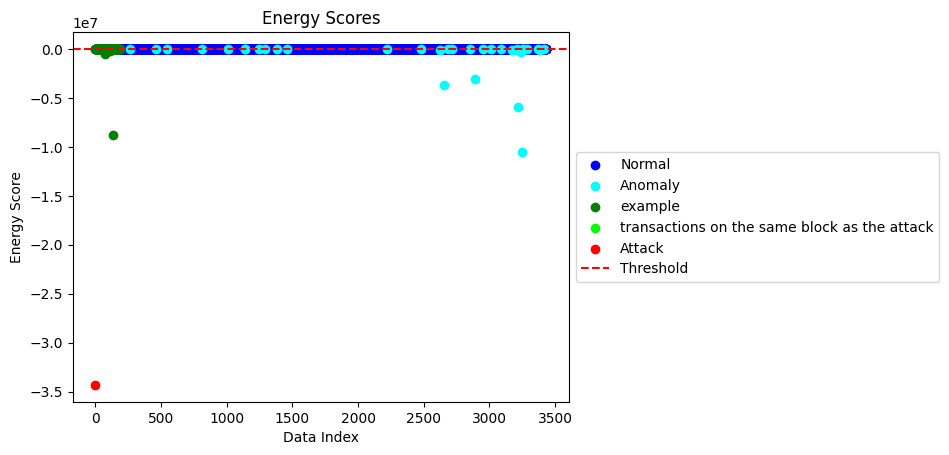

Found you
number of transactions with energy greater or equal to the attack in train is:  0  out of:  2575
number of transactions with energy greater or equal to the attack in test is:  0  out of:  859
number of transactions with energy greater or equal to the attack in example is:  0  out of:  186


In [ ]:
from sklearn import mixture



train_data, test_data = train_test_split(prep_data, test_size=0.25, random_state=40)

clf = mixture.BayesianGaussianMixture(n_components=1, covariance_type="full")
clf.fit(train_data)


# Get anomaly scores for test data
train_energy=clf.score_samples(train_data)
test_energy=clf.score_samples(test_data)
all_energy=np.concatenate((train_energy, test_energy), axis=0)

# Determine anomalies
threshold = np.percentile(all_energy, 1)
print(threshold)




normal_energy=torch.cat((torch.tensor(train_energy), torch.tensor(test_energy)), dim=0)

normal_indices = torch.where(normal_energy > threshold)[0]
anomaly_indices = torch.where(normal_energy <= threshold)[0]
attack = torch.tensor(clf.score_samples(anom.numpy()))
example = torch.tensor(clf.score_samples(exam.numpy()))

print(clf.score_samples(anom.numpy()))


plt.scatter(normal_indices, normal_energy[normal_indices], c='blue', label='Normal')
plt.scatter(anomaly_indices, normal_energy[anomaly_indices], c='cyan', label='Anomaly')
print(attack)

plt.scatter(range(len(example)), example, c='green', label='example')


plt.scatter(range(len(attack[1:3])), attack[1:3], c='lime', label='transactions on the same block as the attack')
plt.scatter(range(1), attack[0], c='red', label='Attack')
plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')
plt.title('Energy Scores')
plt.xlabel('Data Index')
plt.ylabel('Energy Score')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

if(attack[0]<=threshold):
  print("Found you")
else:
  print("try again")


print("number of transactions with energy greater or equal to the attack in train is: ", len(torch.where(torch.tensor(train_energy) <= attack[0])[0]), " out of: ", len(train_energy))
print("number of transactions with energy greater or equal to the attack in test is: ", len(torch.where(torch.tensor(test_energy) <= attack[0])[0]), " out of: ", len(test_energy))
print("number of transactions with energy greater or equal to the attack in example is: ", len(torch.where(example <= attack[0])[0]), " out of: ", len(example))